# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from scipy import stats


#  The Wholesale Customers Data Set is stored in the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/wholesale+customers#           This data presents annual spending in monetary units(m.u.) for various products at a wholesale distributor. Both Channel and Region are nominal variables. Channel 1 refers to hotel, restaurant, or cafe customers and Channel 2 refers to retail customers.  Region 1 refers to Lisbon, Region 2 refers to Porto(Oporto in English), and Region 3 is other. The other variables are continuous and refer to the varied consumer products bought. Trends and relationships among the different products are not readily apparent.

In [2]:
wholesale_data = pd.read_csv("Wholesale customers data.csv")

In [3]:
wholesale_data.rename(columns = {'Delicassen': 'Delicatessen'}, inplace = True)

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
wholesale_data.shape

(440, 8)

In [7]:
wholesale_data.__doc__

'\n    Two-dimensional, size-mutable, potentially heterogeneous tabular data.\n\n    Data structure also contains labeled axes (rows and columns).\n    Arithmetic operations align on both row and column labels. Can be\n    thought of as a dict-like container for Series objects. The primary\n    pandas data structure.\n\n    Parameters\n    ----------\n    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame\n        Dict can contain Series, arrays, constants, dataclass or list-like objects. If\n        data is a dict, column order follows insertion-order. If a dict contains Series\n        which have an index defined, it is aligned by its index.\n\n        .. versionchanged:: 0.25.0\n           If data is a list of dicts, column order follows insertion-order.\n\n    index : Index or array-like\n        Index to use for resulting frame. Will default to RangeIndex if\n        no indexing information part of input data and no index provided.\n    columns : Index or arr

In [8]:
print(wholesale_data.__doc__)


    Two-dimensional, size-mutable, potentially heterogeneous tabular data.

    Data structure also contains labeled axes (rows and columns).
    Arithmetic operations align on both row and column labels. Can be
    thought of as a dict-like container for Series objects. The primary
    pandas data structure.

    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, dataclass or list-like objects. If
        data is a dict, column order follows insertion-order. If a dict contains Series
        which have an index defined, it is aligned by its index.

        .. versionchanged:: 0.25.0
           If data is a list of dicts, column order follows insertion-order.

    index : Index or array-like
        Index to use for resulting frame. Will default to RangeIndex if
        no indexing information part of input data and no index provided.
    columns : Index or array-like
        Column

In [9]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [10]:
import nsfg
import first
import thinkstats2
import thinkplot

In [11]:
type(wholesale_data.Region)

pandas.core.series.Series

#  Create cdf of variable

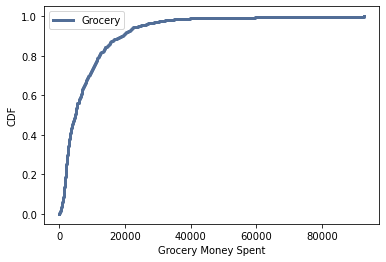

In [12]:
cdf_Grocery = thinkstats2.Cdf(wholesale_data.Grocery, label='Grocery')
thinkplot.Cdf(cdf_Grocery)
thinkplot.Config(xlabel='Grocery Money Spent', ylabel='CDF', loc='upper left')

In [13]:
# % of population who spent 21000 monetary units or less
cdf_Grocery.Prob(21000)

0.9227272727272727

In [14]:
# % of population who spent 0 monetary units or less
cdf_Grocery.Prob(0)

0

In [15]:
# % of population who spent 5000 monetary units or less
cdf_Grocery.Prob(5000)

0.5136363636363637

In [16]:
# % of population who spent 12000 monetary units or less
cdf_Grocery.Prob(12000)

0.7954545454545454

In [17]:
# % of population who spent 63000 monetary units or less
cdf_Grocery.Prob(63000)

0.9954545454545455

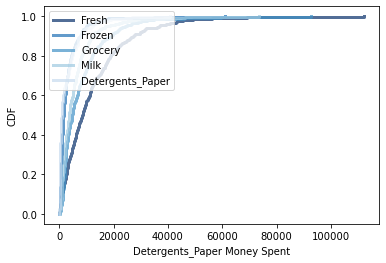

In [18]:
cdf_Fresh = thinkstats2.Cdf(wholesale_data.Fresh, label='Fresh')
thinkplot.Cdf(cdf_Fresh)
thinkplot.Config(xlabel='Fresh Money Spent', ylabel='CDF', loc='upper left')
cdf_Frozen = thinkstats2.Cdf(wholesale_data.Frozen, label='Frozen')
thinkplot.Cdf(cdf_Frozen)
thinkplot.Config(xlabel=' Money Frozen Spent', ylabel='CDF', loc='upper left')
cdf_Grocery = thinkstats2.Cdf(wholesale_data.Grocery, label='Grocery')
thinkplot.Cdf(cdf_Grocery)
thinkplot.Config(xlabel='Grocery Money Spent', ylabel='CDF', loc='upper left')
cdf_Milk = thinkstats2.Cdf(wholesale_data.Milk, label='Milk')
thinkplot.Cdf(cdf_Milk)
thinkplot.Config(xlabel='Milk Money Spent', ylabel='CDF', loc='upper left')
cdf_Detergents_Paper = thinkstats2.Cdf(wholesale_data.Detergents_Paper, label='Detergents_Paper')
thinkplot.Cdf(cdf_Detergents_Paper)
thinkplot.Config(xlabel='Detergents_Paper Money Spent', ylabel='CDF', loc='upper left')


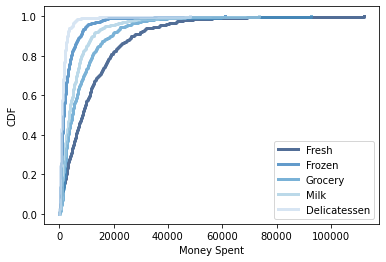

In [19]:
cdf_Fresh = thinkstats2.Cdf(wholesale_data.Fresh, label='Fresh')
thinkplot.Cdf(cdf_Fresh)
thinkplot.Config(xlabel='Money Spent', ylabel='CDF', loc='lower right')
cdf_Frozen = thinkstats2.Cdf(wholesale_data.Frozen, label='Frozen')
thinkplot.Cdf(cdf_Frozen)
thinkplot.Config(xlabel=' Money Spent', ylabel='CDF', loc='lower right')
cdf_Grocery = thinkstats2.Cdf(wholesale_data.Grocery, label='Grocery')
thinkplot.Cdf(cdf_Grocery)
thinkplot.Config(xlabel='Money Spent', ylabel='CDF', loc='lower right')
cdf_Milk = thinkstats2.Cdf(wholesale_data.Milk, label='Milk')
thinkplot.Cdf(cdf_Milk)
thinkplot.Config(xlabel='Money Spent', ylabel='CDF', loc='lower right')
cdf_Delicatessen = thinkstats2.Cdf(wholesale_data.Delicatessen, label='Delicatessen')
thinkplot.Cdf(cdf_Delicatessen)
thinkplot.Config(xlabel='Money Spent', ylabel='CDF', loc='lower right')

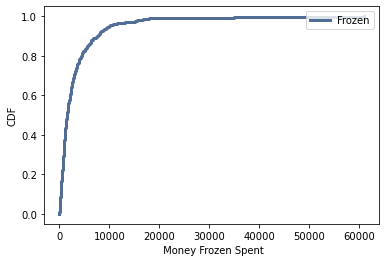

In [20]:
cdf_Frozen = thinkstats2.Cdf(wholesale_data.Frozen, label='Frozen')
thinkplot.Cdf(cdf_Frozen)
thinkplot.Config(xlabel=' Money Frozen Spent', ylabel='CDF', loc='upper right')

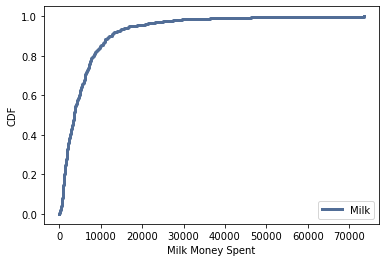

In [21]:
cdf_Milk = thinkstats2.Cdf(wholesale_data.Milk, label='Milk')
thinkplot.Cdf(cdf_Milk)
thinkplot.Config(xlabel='Milk Money Spent', ylabel='CDF', loc='lower right')

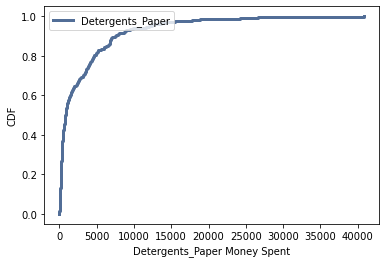

In [22]:
cdf_Detergents_Paper = thinkstats2.Cdf(wholesale_data.Detergents_Paper, label='Detergents_Paper')
thinkplot.Cdf(cdf_Detergents_Paper)
thinkplot.Config(xlabel='Detergents_Paper Money Spent', ylabel='CDF', loc='upper left')

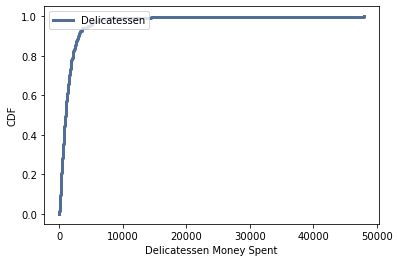

In [23]:
cdf_Delicatessen = thinkstats2.Cdf(wholesale_data.Delicatessen, label='Delicatessen')
thinkplot.Cdf(cdf_Delicatessen)
thinkplot.Config(xlabel='Delicatessen Money Spent', ylabel='CDF', loc='upper left')

#  Create kde pdf, cdf

<AxesSubplot:xlabel='Grocery', ylabel='Density'>

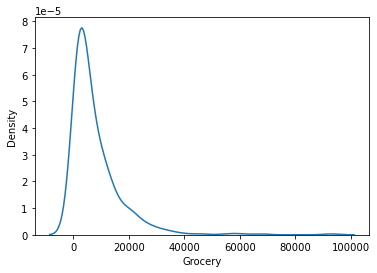

In [24]:
sns.kdeplot(wholesale_data.Grocery)


<AxesSubplot:xlabel='Grocery', ylabel='Density'>

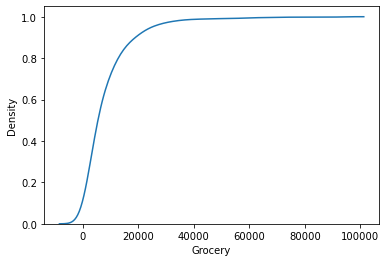

In [25]:
sns.kdeplot(wholesale_data.Grocery, cumulative = True)

<AxesSubplot:xlabel='Fresh', ylabel='Density'>

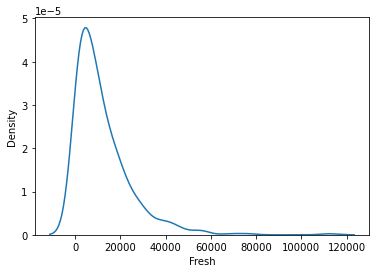

In [26]:
sns.kdeplot(wholesale_data.Fresh)

<AxesSubplot:xlabel='Frozen', ylabel='Density'>

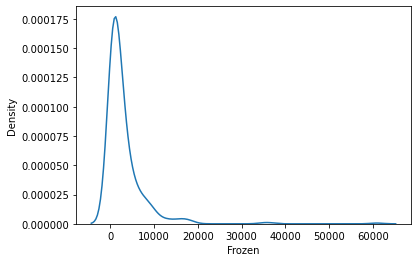

In [27]:
sns.kdeplot(wholesale_data.Frozen)

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Density'>

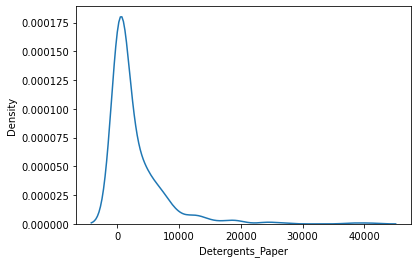

In [28]:
sns.kdeplot(wholesale_data.Detergents_Paper)

<AxesSubplot:xlabel='Delicatessen', ylabel='Density'>

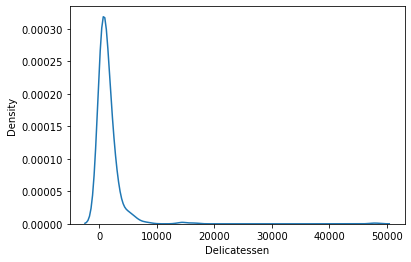

In [29]:
sns.kdeplot(wholesale_data.Delicatessen)

<AxesSubplot:xlabel='Milk', ylabel='Density'>

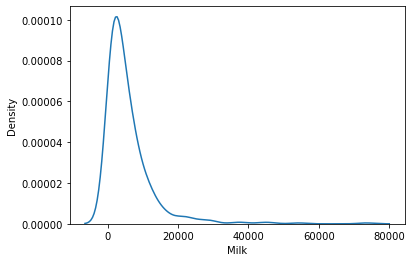

In [30]:
sns.kdeplot(wholesale_data.Milk)

<AxesSubplot:xlabel='Fresh', ylabel='Density'>

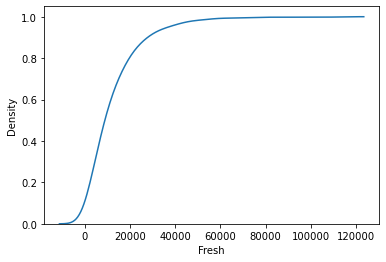

In [31]:
sns.kdeplot(wholesale_data.Fresh, cumulative = True)

<AxesSubplot:xlabel='Frozen', ylabel='Density'>

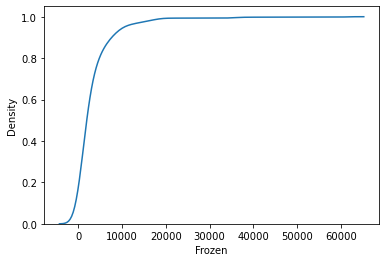

In [32]:
sns.kdeplot(wholesale_data.Frozen, cumulative = True)

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Density'>

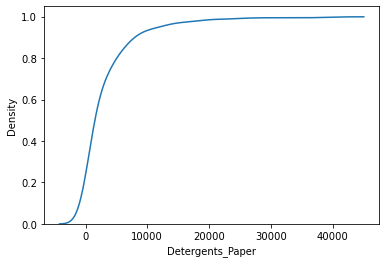

In [33]:
sns.kdeplot(wholesale_data.Detergents_Paper, cumulative = True)

<AxesSubplot:xlabel='Delicatessen', ylabel='Density'>

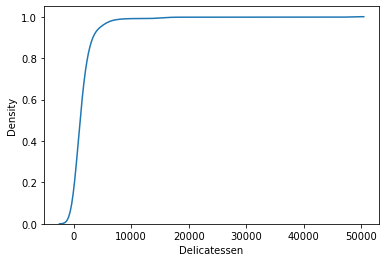

In [34]:
sns.kdeplot(wholesale_data.Delicatessen, cumulative = True)

<AxesSubplot:xlabel='Milk', ylabel='Density'>

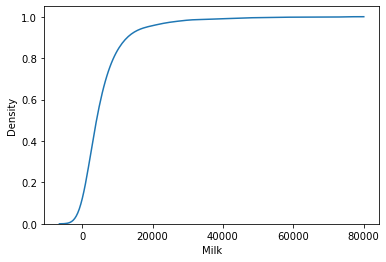

In [35]:
sns.kdeplot(wholesale_data.Milk, cumulative = True)

#  Plot PMF, Hist of the Region variable

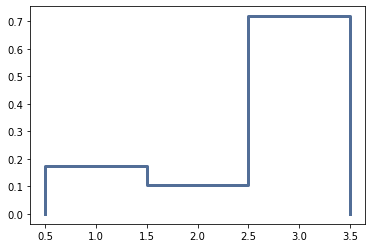

In [36]:
# PMF of variable Region over the entire dataset
pmf = thinkstats2.Pmf(wholesale_data.Region, label="Region")
pmf_region = thinkplot.Pmf(pmf)

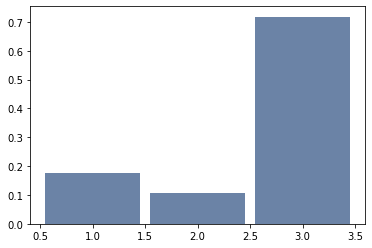

In [37]:
thinkplot.Hist(pmf)

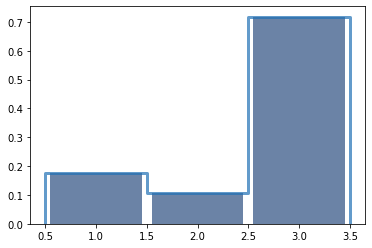

In [38]:
thinkplot.Hist(pmf)
thinkplot.Pmf(pmf)

In [39]:
# Breakdown of Region variable
wholesale_data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [40]:
wholesale_data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [41]:
wholesale_data.groupby('Channel').Region.mean()

Channel
1    2.510067
2    2.612676
Name: Region, dtype: float64

In [42]:
group_by_channel = wholesale_data.groupby('Channel').Region

In [43]:
type(group_by_channel )

pandas.core.groupby.generic.SeriesGroupBy

In [44]:
group_by_channel.mean()

Channel
1    2.510067
2    2.612676
Name: Region, dtype: float64

In [45]:
region_channel1 = wholesale_data[wholesale_data.Channel==1]

In [46]:
 wholesale_data[wholesale_data.Channel==1].value_counts()

Channel  Region  Fresh   Milk   Grocery  Frozen  Detergents_Paper  Delicatessen
1        1       514     8323   6869     529     93                1040            1
         3       11243   2408   2593     15348   108               1886            1
                 11134   793    2988     2715    276               610             1
                 11002   7075   4945     1152    120               395             1
                 10766   1175   2067     2096    301               167             1
                                                                                  ..
                 622     55     137      75      7                 8               1
                 608     1106   1533     830     90                195             1
                 518     4180   3600     659     122               654             1
                 503     112    778      895     56                132             1
                 112151  29627  18148    16745   4948              855

In [47]:
region_channel1.mean()

Channel                 1.000000
Region                  2.510067
Fresh               13475.560403
Milk                 3451.724832
Grocery              3962.137584
Frozen               3748.251678
Detergents_Paper      790.560403
Delicatessen         1415.956376
dtype: float64

In [48]:
region_channel2 = wholesale_data[wholesale_data.Channel!=1]

In [49]:
region_channel2.mean()

Channel                 2.000000
Region                  2.612676
Fresh                8904.323944
Milk                10716.500000
Grocery             16322.852113
Frozen               1652.612676
Detergents_Paper     7269.507042
Delicatessen         1753.436620
dtype: float64

#  Retail outpaced hotel/restaurant/cafe in milk, grocery, detergents and paper, and delicatessen.

In [50]:
region_channel1.Region.head(12)

3     3
8     3
15    3
17    3
19    3
21    3
22    3
26    3
27    3
29    3
30    3
31    3
Name: Region, dtype: int64

In [51]:
pmf_channel1 = thinkstats2.Pmf(region_channel1.Region, label="Region")

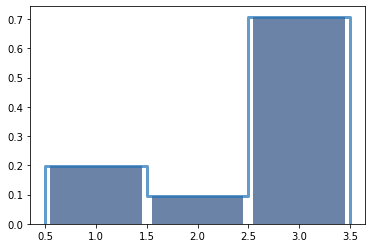

In [52]:
region_channel1 = wholesale_data[wholesale_data.Channel==1]
pmf_channel1 = thinkstats2.Pmf(region_channel1.Region, label="Region")
thinkplot.Hist(pmf_channel1)
thinkplot.Pmf(pmf_channel1)

In [53]:
region_channel_not1 = wholesale_data[wholesale_data.Channel!=1]

In [54]:
region_channel_not1.value_counts()

Channel  Region  Fresh  Milk   Grocery  Frozen  Detergents_Paper  Delicatessen
2        1       18     7504   15205    1285    4797              6372            1
         3       8797   10646  14886    2471    8969              1438            1
                 7823   6245   6544     4154    4074              964             1
                 7842   6046   8552     1691    3540              1874            1
                 8040   7639   11687    2758    6839              404             1
                                                                                 ..
                 180    3485   20292    959     5618              666             1
                 117    6264   21203    228     8682              1111            1
                 85     20959  45828    36      24231             1423            1
                 37     1275   22272    137     6747              110             1
                 44466  54259  55571    7782    24171             6465           

In [55]:
pmf_channel_not1 = thinkstats2.Pmf(region_channel_not1.Region, label="Region")

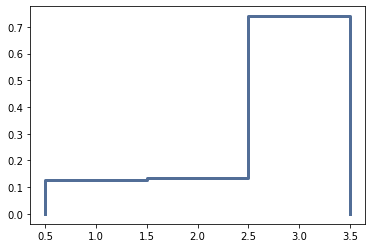

In [56]:
pmf_region_channel_not1 = thinkplot.Pmf(pmf_channel_not1)

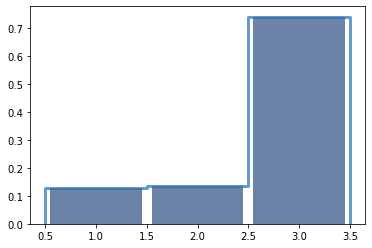

In [57]:
region_channel_not1 = wholesale_data[wholesale_data.Channel!=1]
pmf_channel_not1 = thinkstats2.Pmf(region_channel_not1.Region, label="Region")
thinkplot.Hist(pmf_channel_not1)
thinkplot.Pmf(pmf_channel_not1)



In [58]:
# Print out stats for variables grouped by channel
wholesale_data.groupby('Channel').agg(['count', 'min', 'max', 'mean'])

Region                   Fresh                            Milk       \
         count min max      mean count min     max          mean count  min   
Channel                                                                       
1          298   1   3  2.510067   298   3  112151  13475.560403   298   55   
2          142   1   3  2.612676   142  18   44466   8904.323944   142  928   

                             Grocery                            Frozen      \
           max          mean   count   min    max          mean  count min   
Channel                                                                      
1        43950   3451.724832     298     3  21042   3962.137584    298  25   
2        73498  10716.500000     142  2743  92780  16322.852113    142  33   

                            Detergents_Paper                           \
           max         mean            count  min    max         mean   
Channel                                                                 
1        60869  3748.251678              298    3   6907   790.560403   
2        11559  1652.612676              142  332  40827  7269.507042   

        Delicatessen                          
               count min    max         mean  
Channel                                       
1                298   3  47943  1415.956376  
2                142   3  16523  1753.436620

<AxesSubplot:xlabel='Region'>

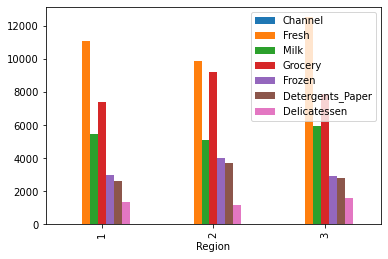

In [59]:
wholesale_data.groupby('Region').mean().plot(kind='bar')

In [60]:
region_by_channel = wholesale_data.groupby("Region")["Channel"].count
region_by_channel

<bound method GroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000025D038E9E80>>

In [61]:
new_df = wholesale_data.sort_values(by=['Region', 'Channel'])

In [62]:
new_df['Region_by_Channel'] = new_df.groupby('Region')['Channel'].diff()

In [63]:
new_df.head(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Region_by_Channel
196,1,1,30624,7209,4897,18711,763,2876,NaN
198,1,1,11686,2154,6824,3527,592,697,0.0
199,1,1,9670,2280,2112,520,402,347,0.0
202,1,1,25203,11487,9490,5065,284,6854,0.0
203,1,1,583,685,2216,469,954,18,0.0
204,1,1,1956,891,5226,1383,5,1328,0.0
206,1,1,6373,780,950,878,288,285,0.0
208,1,1,1537,3748,5838,1859,3381,806,0.0
210,1,1,18567,1895,1393,1801,244,2100,0.0
212,1,1,7291,1012,2062,1291,240,1775,0.0


In [64]:
pmf_channel = thinkstats2.Pmf(wholesale_data.Channel)

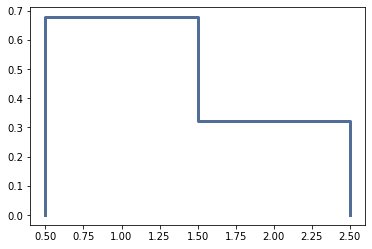

In [65]:
thinkplot.Pmf(pmf_channel)

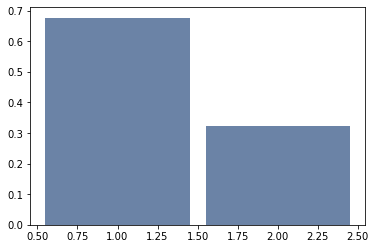

In [66]:
thinkplot.Hist(pmf_channel)

In [67]:
pmf34 = wholesale_data.groupby(['Region', "Channel"])

In [68]:
type(pmf34)

pandas.core.groupby.generic.DataFrameGroupBy

In [69]:
#thinkplot.Pmf(pmf34)

In [70]:
wholesale_data.groupby(['Region', "Channel"]).first()

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Region Channel                                                               
1      1        30624   7209     4897   18711               763          2876
       2         2427   7097    10391    1127              4314          1468
2      1        21273   2013     6550     909               811          1854
       2         3996  11103    12469     902              5952           741
3      1        13265   1196     4221    6404               507          1788
       2        12669   9656     7561     214              2674          1338

In [71]:
wholesale_data.groupby(['Region', "Channel"]).value_counts()

Region  Channel  Fresh  Milk   Grocery  Frozen  Detergents_Paper  Delicatessen
1       1        514    8323   6869     529     93                1040            1
                 583    685    2216     469     954               18              1
                 31614  489    1495     3242    111               615             1
                 56083  4563   2124     6422    730               3321            1
                 53205  4959   7336     3012    967               818             1
                                                                                 ..
3       2        2932   6459   7677     2561    4573              1386            1
                 2861   6570   9618     930     4004              1682            1
                 2771   6939   15541    2693    6600              1115            1
                 2343   7845   11874    52      4196              1697            1
                 44466  54259  55571    7782    24171             6465           

In [72]:
wholesale_data.shape

(440, 8)

In [73]:
wholesale_data = wholesale_data.drop_duplicates(keep='first')

In [74]:
# Check for duplicate rows
wholesale_data.shape

(440, 8)

In [75]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


In [76]:
wholesale_data.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [77]:
wholesale_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [78]:
wholesale_data.head(8)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566


In [79]:
# Add columns
wholesale_data.sum()

Channel                 582
Region                 1119
Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

In [80]:
# Add rows
wholesale_data.sum(axis=1)

0      34117
1      33271
2      36615
3      27385
4      46105
       ...  
435    73306
436    48376
437    77412
438    17838
439     7593
Length: 440, dtype: int64

In [81]:
Fresh_sort = wholesale_data.sort_values(by = 'Fresh', ascending = False).head(14)
Fresh_sort


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,1,3,112151,29627,18148,16745,4948,8550
125,1,3,76237,3473,7102,16538,778,918
284,1,3,68951,4411,12609,8692,751,2406
39,1,3,56159,555,902,10002,212,2916
258,1,1,56083,4563,2124,6422,730,3321
103,1,3,56082,3504,8906,18028,1480,2498
259,1,1,53205,4959,7336,3012,967,818
282,1,3,49063,3965,4252,5970,1041,1404
239,1,1,47493,2567,3779,5243,828,2253
176,1,3,45640,6958,6536,7368,1532,230


(array([[14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  4.,  4.,  3.,  2.,  0.,  0.,  1.],
        [12.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [11.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [11.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [13.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [13.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([1.00000e+00, 1.12160e+04, 2.24310e+04, 3.36460e+04, 4.48610e+04,
        5.60760e+04, 6.72910e+04, 7.85060e+04, 8.97210e+04, 1.00936e+05,
        1.12151e+05]),
 <a list of 8 BarContainer objects>)

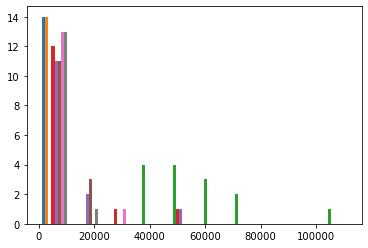

In [82]:
plt.hist(Fresh_sort)

In [83]:
Fresh_sort_asc = wholesale_data.sort_values(by = 'Fresh', ascending = True).head(14)
Fresh_sort_asc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
95,1,3,3,2920,6252,440,223,709
338,1,2,3,333,7021,15601,15,550
66,1,3,9,1534,7417,175,3468,27
218,2,1,18,7504,15205,1285,4797,6372
96,2,3,23,2616,8118,145,3874,217
357,2,3,37,1275,22272,137,6747,110
65,2,3,85,20959,45828,36,24231,1423
412,1,3,97,3605,12400,98,2970,62
353,2,3,117,6264,21203,228,8682,1111
128,1,3,140,8847,3823,142,1062,3


In [84]:
wholesale_data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [85]:
split_df = wholesale_data.groupby(['Channel'])
split_df

In [86]:
wholesale_data['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [87]:
sort_channel_region = wholesale_data.groupby(['Channel', 'Region'])

In [88]:
sort_channel_region

In [89]:
sort_channel_region.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
8,1,3,5963,3648,6192,425,1716,750
15,1,3,10253,1114,3821,397,964,412
17,1,3,5876,6157,2933,839,370,4478
19,1,3,7780,2495,9464,669,2518,501


In [90]:
sort_channel_region.mean()

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper  Delicatessen  
Channel Region                                  
1       1             950.525424   1197.152542  
        2             482.714286   1105.892857  
        3             786.682464   1518.284360  
2       1            8225.277778   1871.944444  
        2            8410.263158   1239.000000  
        3            6899.238095   1826.209524

In [91]:
sort_channel_region.median()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                      
1       1       8656.0  2280.0   2576.0  1859.0             412.0   
        2       9787.0  1560.5   3352.0  2696.5             325.0   
        3       9612.0  2247.0   2642.0  1960.0             375.0   
2       1       2926.0  8866.0  16106.0  1522.0            6177.0   
        2       6468.0  6817.0  12469.0   934.0            6236.0   
        3       7362.0  7845.0  12121.0  1059.0            5121.0   

                Delicatessen  
Channel Region                
1       1              749.0  
        2              883.0  
        3              823.0  
2       1             1414.0  
        2             1037.0  
        3             1386.0

In [92]:
sort_channel_region.describe()

Fresh                                                      \
                count          mean           std    min      25%     50%   
Channel Region                                                              
1       1        59.0  12902.254237  12342.008901  514.0  4437.50  8656.0   
        2        28.0  11650.535714   8969.362752    3.0  4938.25  9787.0   
        3       211.0  13878.052133  14746.572913    3.0  3702.50  9612.0   
2       1        18.0   5200.000000   5415.521495   18.0  2378.25  2926.0   
        2        19.0   7289.789474   6867.934548  161.0  2368.00  6468.0   
        3       105.0   9831.504762   9635.394129   23.0  2343.00  7362.0   

                                    Milk                                      \
                    75%       max  count          mean           std     min   
Channel Region                                                                 
1       1       18135.0   56083.0   59.0   3870.203390   4298.321195   258.0   
        2       17031.5   32717.0   28.0   2304.250000   2968.628697   333.0   
        3       18821.0  112151.0  211.0   3486.981043   4508.505269    55.0   
2       1        5988.0   20782.0   18.0  10784.000000   6609.221463  2527.0   
        2        9162.0   27082.0   19.0   9190.789474   6611.354136   928.0   
        3       15076.0   44466.0  105.0  10981.009524  10574.827178  1124.0   

                                                   Grocery                \
                    25%     50%       75%      max   count          mean   
Channel Region                                                             
1       1       1071.00  2280.0   4995.50  23527.0    59.0   4026.135593   
        2       1146.00  1560.5   2344.75  16784.0    28.0   4395.500000   
        3       1188.50  2247.0   4205.00  43950.0   211.0   3886.734597   
2       1       6253.25  8866.0  13112.25  28326.0    18.0  18471.944444   
        2       4148.50  6817.0  13127.50  25071.0    19.0  16326.315789   
        3       6128.00  7845.0  11114.00  73498.0   105.0  15953.809524   

                                                                            \
                         std     min       25%      50%       75%      max   
Channel Region                                                               
1       1        3629.644143   489.0   1620.00   2576.0   5172.50  16966.0   
        2        3048.298815  1330.0   2373.75   3352.0   5527.50  13626.0   
        3        3593.506056     3.0   1666.00   2642.0   4927.50  21042.0   
2       1       10414.687844  5265.0  10634.25  16106.0  23478.75  39694.0   
        2       14035.453775  2743.0   9318.50  12469.0  19785.50  67298.0   
        3       12298.935356  4523.0   9170.00  12121.0  19805.00  92780.0   

               Frozen                                                    \
                count         mean           std    min     25%     50%   
Channel Region                                                            
1       1        59.0  3127.322034   3276.460124   91.0  966.00  1859.0   
        2        28.0  5745.035714  11454.478518  264.0  962.25  2696.5   
        3       211.0  3656.900474   4956.590848   25.0  779.00  1960.0   
2       1        18.0  2584.111111   2424.774577   61.0  923.50  1522.0   
        2        19.0  1540.578947   2473.266471  131.0  639.50   934.0   
        3       105.0  1513.200000   1504.498737   33.0  437.00  1059.0   

                                Detergents_Paper                            \
                   75%      max            count         mean          std   
Channel Region                                                               
1       1       4479.0  18711.0             59.0   950.525424  1305.907616   
        2       4617.0  60869.0             28.0   482.714286   425.310506   
        3       4542.5  36534.0            211.0   786.682464  1099.970640   
2       1       3843.0   8321.0             18.0  8225.277778  5515.8

In [93]:
sort_channel_region.describe().head(20)

Fresh                                                      \
                count          mean           std    min      25%     50%   
Channel Region                                                              
1       1        59.0  12902.254237  12342.008901  514.0  4437.50  8656.0   
        2        28.0  11650.535714   8969.362752    3.0  4938.25  9787.0   
        3       211.0  13878.052133  14746.572913    3.0  3702.50  9612.0   
2       1        18.0   5200.000000   5415.521495   18.0  2378.25  2926.0   
        2        19.0   7289.789474   6867.934548  161.0  2368.00  6468.0   
        3       105.0   9831.504762   9635.394129   23.0  2343.00  7362.0   

                                    Milk                                      \
                    75%       max  count          mean           std     min   
Channel Region                                                                 
1       1       18135.0   56083.0   59.0   3870.203390   4298.321195   258.0   
        2       17031.5   32717.0   28.0   2304.250000   2968.628697   333.0   
        3       18821.0  112151.0  211.0   3486.981043   4508.505269    55.0   
2       1        5988.0   20782.0   18.0  10784.000000   6609.221463  2527.0   
        2        9162.0   27082.0   19.0   9190.789474   6611.354136   928.0   
        3       15076.0   44466.0  105.0  10981.009524  10574.827178  1124.0   

                                                   Grocery                \
                    25%     50%       75%      max   count          mean   
Channel Region                                                             
1       1       1071.00  2280.0   4995.50  23527.0    59.0   4026.135593   
        2       1146.00  1560.5   2344.75  16784.0    28.0   4395.500000   
        3       1188.50  2247.0   4205.00  43950.0   211.0   3886.734597   
2       1       6253.25  8866.0  13112.25  28326.0    18.0  18471.944444   
        2       4148.50  6817.0  13127.50  25071.0    19.0  16326.315789   
        3       6128.00  7845.0  11114.00  73498.0   105.0  15953.809524   

                                                                            \
                         std     min       25%      50%       75%      max   
Channel Region                                                               
1       1        3629.644143   489.0   1620.00   2576.0   5172.50  16966.0   
        2        3048.298815  1330.0   2373.75   3352.0   5527.50  13626.0   
        3        3593.506056     3.0   1666.00   2642.0   4927.50  21042.0   
2       1       10414.687844  5265.0  10634.25  16106.0  23478.75  39694.0   
        2       14035.453775  2743.0   9318.50  12469.0  19785.50  67298.0   
        3       12298.935356  4523.0   9170.00  12121.0  19805.00  92780.0   

               Frozen                                                    \
                count         mean           std    min     25%     50%   
Channel Region                                                            
1       1        59.0  3127.322034   3276.460124   91.0  966.00  1859.0   
        2        28.0  5745.035714  11454.478518  264.0  962.25  2696.5   
        3       211.0  3656.900474   4956.590848   25.0  779.00  1960.0   
2       1        18.0  2584.111111   2424.774577   61.0  923.50  1522.0   
        2        19.0  1540.578947   2473.266471  131.0  639.50   934.0   
        3       105.0  1513.200000   1504.498737   33.0  437.00  1059.0   

                                Detergents_Paper                            \
                   75%      max            count         mean          std   
Channel Region                                                               
1       1       4479.0  18711.0             59.0   950.525424  1305.907616   
        2       4617.0  60869.0             28.0   482.714286   425.310506   
        3       4542.5  36534.0            211.0   786.682464  1099.970640   
2       1       3843.0   8321.0             18.0  8225.277778  5515.8

In [94]:
sort_channel_region.dtypes

Fresh   Milk Grocery Frozen Detergents_Paper Delicatessen
Channel Region                                                           
1       1       int64  int64   int64  int64            int64        int64
        2       int64  int64   int64  int64            int64        int64
        3       int64  int64   int64  int64            int64        int64
2       1       int64  int64   int64  int64            int64        int64
        2       int64  int64   int64  int64            int64        int64
        3       int64  int64   int64  int64            int64        int64

In [95]:
sort_channel_region.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
8,1,3,5963,3648,6192,425,1716,750
15,1,3,10253,1114,3821,397,964,412
17,1,3,5876,6157,2933,839,370,4478
19,1,3,7780,2495,9464,669,2518,501


In [96]:
sort_channel_region.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
327,1,2,542,899,1664,414,88,522
331,2,2,11223,14881,26839,1234,9606,1102
333,2,2,8565,4980,67298,131,38102,1215
334,2,2,16823,928,2743,11559,332,3486


In [97]:
split_df.get_group(2).head(34)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
9,2,3,6006,11093,18881,1159,7425,2098
10,2,3,3366,5403,12974,4400,5977,1744
11,2,3,13146,1124,4523,1420,549,497


In [98]:
split_df.get_group(2).mean()

Channel                 2.000000
Region                  2.612676
Fresh                8904.323944
Milk                10716.500000
Grocery             16322.852113
Frozen               1652.612676
Detergents_Paper     7269.507042
Delicatessen         1753.436620
dtype: float64

In [99]:
split_df.get_group(2).median()

Channel                 2.0
Region                  3.0
Fresh                5993.5
Milk                 7812.0
Grocery             12390.0
Frozen               1081.0
Detergents_Paper     5614.5
Delicatessen         1350.0
dtype: float64

In [100]:
split_df.get_group(1).median()

Channel                1.0
Region                 3.0
Fresh               9581.5
Milk                2157.0
Grocery             2684.0
Frozen              2057.5
Detergents_Paper     385.5
Delicatessen         821.0
dtype: float64

In [101]:
split_df.get_group(1).mean()

Channel                 1.000000
Region                  2.510067
Fresh               13475.560403
Milk                 3451.724832
Grocery              3962.137584
Frozen               3748.251678
Detergents_Paper      790.560403
Delicatessen         1415.956376
dtype: float64

<AxesSubplot:xlabel='Fresh'>

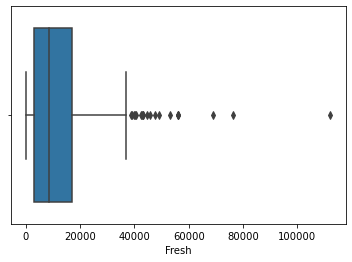

In [102]:
sns.boxplot(x=wholesale_data.Fresh)

In [103]:
# Find index of max value
wholesale_data.idxmax()

Channel               0
Region                0
Fresh               181
Milk                 86
Grocery              85
Frozen              325
Detergents_Paper     85
Delicatessen        183
dtype: int64

In [104]:
Milk_sort = wholesale_data.sort_values(by = 'Milk', ascending = False).head(16)
Milk_sort

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,2,3,22925,73498,32114,987,20070,903
47,2,3,44466,54259,55571,7782,24171,6465
85,2,3,16117,46197,92780,1026,40827,2944
183,1,3,36847,43950,20170,36534,239,47943
61,2,3,35942,38369,59598,3254,26701,2017
23,2,3,26373,36423,22019,5154,4337,16523
56,2,3,4098,29892,26866,2616,17740,1340
181,1,3,112151,29627,18148,16745,4948,8550
211,2,1,12119,28326,39694,4736,19410,2870
92,2,3,9198,27472,32034,3232,18906,5130


In [105]:
wholesale_data.idxmin()

Channel               3
Region              196
Fresh                95
Milk                154
Grocery              75
Frozen              420
Detergents_Paper     75
Delicatessen        109
dtype: int64

In [106]:
Milk_sort_asc = wholesale_data.sort_values(by = 'Milk', ascending = True).head(16)
Milk_sort_asc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,1,3,622,55,137,75,7,8
98,1,3,503,112,778,895,56,132
356,1,3,22686,134,218,3157,9,548
122,1,3,12212,201,245,1991,25,860
97,1,3,403,254,610,774,54,63
269,1,1,15218,258,1138,2516,333,204
289,1,3,42786,286,471,1388,32,22
191,1,3,13624,295,1381,890,43,84
338,1,2,3,333,7021,15601,15,550
369,1,3,6211,337,683,1089,41,296


<AxesSubplot:xlabel='Milk'>

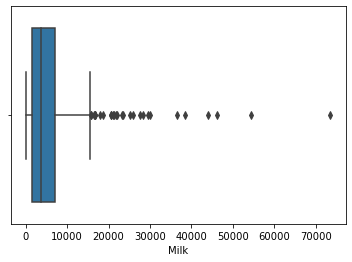

In [107]:
sns.boxplot(x=wholesale_data.Milk)

In [108]:
Grocery_sort = wholesale_data.sort_values(by = 'Grocery', ascending = False).head(15)
Grocery_sort

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
85,2,3,16117,46197,92780,1026,40827,2944
333,2,2,8565,4980,67298,131,38102,1215
61,2,3,35942,38369,59598,3254,26701,2017
47,2,3,44466,54259,55571,7782,24171,6465
65,2,3,85,20959,45828,36,24231,1423
211,2,1,12119,28326,39694,4736,19410,2870
216,2,1,2532,16599,36486,179,13308,674
145,2,3,22039,8384,34792,42,12591,4430
251,2,1,6134,23133,33586,6746,18594,5121
86,2,3,22925,73498,32114,987,20070,903


In [109]:
Grocery_sort_asc = wholesale_data.sort_values(by = 'Grocery', ascending = True).head(15)
Grocery_sort_asc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,1,3,20398,1137,3,4407,3,975
154,1,3,622,55,137,75,7,8
356,1,3,22686,134,218,3157,9,548
275,1,3,680,1610,223,862,96,379
122,1,3,12212,201,245,1991,25,860
161,1,3,12434,540,283,1092,3,2233
131,1,3,2101,589,314,346,70,310
289,1,3,42786,286,471,1388,32,22
247,1,1,13569,346,489,2077,44,659
367,1,3,3477,894,534,1457,252,342


<AxesSubplot:xlabel='Grocery'>

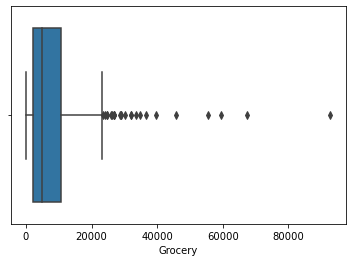

In [110]:
sns.boxplot(x=wholesale_data.Grocery)

In [111]:
Frozen_sort = wholesale_data.sort_values(by = 'Frozen', ascending = False).head(11)
Frozen_sort

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
325,1,2,32717,16784,13626,60869,1272,5609
183,1,3,36847,43950,20170,36534,239,47943
93,1,3,11314,3090,2062,35009,71,2698
196,1,1,30624,7209,4897,18711,763,2876
103,1,3,56082,3504,8906,18028,1480,2498
413,1,3,4983,4859,6633,17866,912,2435
277,1,3,9061,829,683,16919,621,139
181,1,3,112151,29627,18148,16745,4948,8550
125,1,3,76237,3473,7102,16538,778,918
338,1,2,3,333,7021,15601,15,550


In [112]:
Frozen_sort_asc = wholesale_data.sort_values(by = 'Frozen', ascending = True).head(11)
Frozen_sort_asc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
420,1,3,4456,5266,13227,25,6818,1393
38,2,3,4591,15729,16709,33,6956,433
65,2,3,85,20959,45828,36,24231,1423
57,2,3,5417,9933,10487,38,7572,1282
145,2,3,22039,8384,34792,42,12591,4430
429,1,3,8607,1750,3580,47,84,2501
175,2,3,2343,7845,11874,52,4196,1697
264,2,1,1073,9679,15445,61,5980,1265
439,1,3,2787,1698,2510,65,477,52
184,1,3,327,918,4710,74,334,11


<AxesSubplot:xlabel='Frozen'>

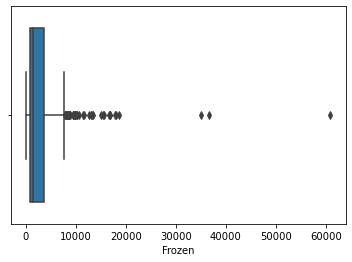

In [113]:
sns.boxplot(x=wholesale_data.Frozen)

In [114]:
Detergents_Paper_sort = wholesale_data.sort_values(by = 'Detergents_Paper', ascending = False).head(13)
Detergents_Paper_sort

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
85,2,3,16117,46197,92780,1026,40827,2944
333,2,2,8565,4980,67298,131,38102,1215
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
47,2,3,44466,54259,55571,7782,24171,6465
86,2,3,22925,73498,32114,987,20070,903
211,2,1,12119,28326,39694,4736,19410,2870
92,2,3,9198,27472,32034,3232,18906,5130
251,2,1,6134,23133,33586,6746,18594,5121
56,2,3,4098,29892,26866,2616,17740,1340


In [115]:
Detergents_Paper_sort_asc = wholesale_data.sort_values(by = 'Detergents_Paper', ascending = True).head(13)
Detergents_Paper_sort_asc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
161,1,3,12434,540,283,1092,3,2233
75,1,3,20398,1137,3,4407,3,975
204,1,1,1956,891,5226,1383,5,1328
154,1,3,622,55,137,75,7,8
356,1,3,22686,134,218,3157,9,548
402,1,3,26539,4753,5091,220,10,340
338,1,2,3,333,7021,15601,15,550
142,1,3,37036,7152,8253,2995,20,3
177,1,3,12759,7330,4533,1752,20,2631
122,1,3,12212,201,245,1991,25,860


<AxesSubplot:xlabel='Detergents_Paper'>

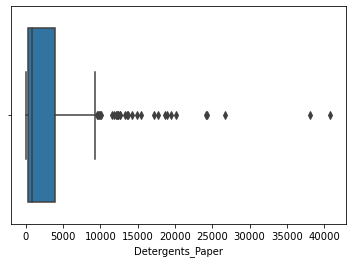

In [116]:
sns.boxplot(x=wholesale_data.Detergents_Paper)

In [117]:
wholesale_data.rename(columns = {'Delicassen': 'Delicatessen'}, inplace = True)

In [118]:
wholesale_data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [119]:
wholesale_data['Fresh'].value_counts()

9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: Fresh, Length: 433, dtype: int64

In [120]:
wholesale_data['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [121]:
wholesale_data['Region'].value_counts(normalize=True)

3    0.718182
1    0.175000
2    0.106818
Name: Region, dtype: float64

In [122]:
split_df =wholesale_data.groupby('Channel')
split_df

In [123]:
for Channel, wholesale_df in split_df:
    print(Channel)
    print(split_df)

1
2


In [124]:
split_df.max()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
1,3,112151,43950,21042,60869,6907,47943
2,3,44466,73498,92780,11559,40827,16523


In [125]:
split_df.mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


In [126]:
split_region = wholesale_data.groupby('Region')
split_region

In [127]:
split_region.value_counts()

Region  Channel  Fresh  Milk   Grocery  Frozen  Detergents_Paper  Delicatessen
1       1        514    8323   6869     529     93                1040            1
                 583    685    2216     469     954               18              1
        2        3067   13240  23127    3941    9959              731             1
                 20782  5921   9212     1759    2568              1553            1
                 12119  28326  39694    4736    19410             2870            1
                                                                                 ..
3       1        955    5479   6536     333     2840              707             1
                 894    1703   1841     744     759               1153            1
                 796    5878   2109     340     232               776             1
                 759    18664  1660     6114    536               4100            1
        2        44466  54259  55571    7782    24171             6465           

In [128]:
split_region.describe()

Channel                                               Fresh  \
         count      mean       std  min  25%  50%  75%  max  count   
Region                                                               
1         77.0  1.233766  0.426000  1.0  1.0  1.0  1.0  2.0   77.0   
2         47.0  1.404255  0.496053  1.0  1.0  1.0  2.0  2.0   47.0   
3        316.0  1.332278  0.471777  1.0  1.0  1.0  2.0  2.0  316.0   

                                                                              \
                mean           std   min      25%     50%      75%       max   
Region                                                                         
1       11101.727273  11557.438575  18.0  2806.00  7363.0  15218.0   56083.0   
2        9887.680851   8387.899211   3.0  2751.50  8090.0  14925.5   32717.0   
3       12533.471519  13389.213115   3.0  3350.75  8752.5  17406.5  112151.0   

         Milk                                                            \
        count         mean          std    min     25%     50%      75%   
Region                                                                    
1        77.0  5486.415584  5704.856079  258.0  1372.0  3748.0  7503.00   
2        47.0  5088.170213  5826.343145  333.0  1430.5  2374.0  5772.50   
3       316.0  5977.085443  7935.463443   55.0  1634.0  3684.5  7198.75   

                Grocery                                                     \
            max   count         mean           std     min     25%     50%   
Region                                                                       
1       28326.0    77.0  7403.077922   8496.287728   489.0  2046.0  3838.0   
2       25071.0    47.0  9218.595745  10842.745314  1330.0  2792.5  6114.0   
3       73498.0   316.0  7896.363924   9537.287778     3.0  2141.5  4732.0   

                          Frozen                                           \
             75%      max  count         mean          std    min     25%   
Region                                                                      
1        9490.00  39694.0   77.0  3000.337662  3092.143894   61.0  950.00   
2       11758.50  67298.0   47.0  4045.361702  9151.784954  131.0  811.50   
3       10559.75  92780.0  316.0  2944.594937  4260.126243   25.0  664.75   

                                 Detergents_Paper                            \
           50%      75%      max            count         mean          std   
Region                                                                        
1       1801.0  4324.00  18711.0             77.0  2651.116883  4208.462708   
2       1455.0  3272.00  60869.0             47.0  3687.468085  6514.717668   
3       1498.0  3354.75  36534.0            316.0  2817.753165  4593.051613   

                                              Delicatessen               \
         min     25%    50%      75%      max        count         mean   
Region                                                                    
1        5.0  284.00  737.0  3593.00  19410.0         77.0  1354.896104   
2       15.0  282.50  811.0  4324.50  38102.0         47.0  1159.702128   
3        3.0  251.25  856.0  3875.75  40827.0        316.0  1620.601266   

                                                           
                std   min    25%    50%      75%      max  
Region                                                     
1       1345.423340   7.0  548.0  806.0  1775.00   6854.0  
2       1050.739841  51.0  540.5  898.0  1538.50   5609.0  
3       3232.581660   3.0  402.0  994.0  1832.75  47943.0

In [129]:
split_region.mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


#  The Porto region averaged more than Lisbon and other in grocery, detergents and paper, and frozen.

In [130]:
Delicatessen_sort = wholesale_data.sort_values(by = 'Delicatessen', ascending = False).head(12)
Delicatessen_sort

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
183,1,3,36847,43950,20170,36534,239,47943
23,2,3,26373,36423,22019,5154,4337,16523
71,1,3,18291,1266,21042,5373,4173,14472
87,1,3,43265,5025,8117,6312,1579,14351
181,1,3,112151,29627,18148,16745,4948,8550
2,2,3,6353,8808,7684,2405,3516,7844
202,1,1,25203,11487,9490,5065,284,6854
47,2,3,44466,54259,55571,7782,24171,6465
218,2,1,18,7504,15205,1285,4797,6372
171,2,3,200,25862,19816,651,8773,6250


In [131]:
wholesale_data.std()

Channel                 0.468052
Region                  0.774272
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [132]:
Delicatessen_sort_asc = wholesale_data.sort_values(by = 'Delicatessen', ascending = True).head(12)
Delicatessen_sort_asc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,2,3,1406,16729,28986,673,836,3
128,1,3,140,8847,3823,142,1062,3
142,1,3,37036,7152,8253,2995,20,3
187,1,3,2438,8002,9819,6269,3459,3
233,1,1,964,4984,3316,937,409,7
154,1,3,622,55,137,75,7,8
184,1,3,327,918,4710,74,334,11
285,1,3,40254,640,3600,1042,436,18
203,1,1,583,685,2216,469,954,18
289,1,3,42786,286,471,1388,32,22


<AxesSubplot:xlabel='Delicatessen'>

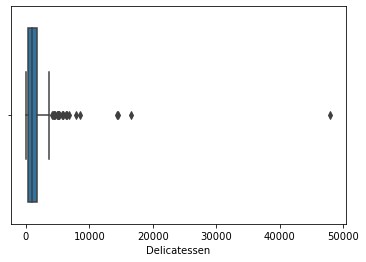

In [133]:
sns.boxplot(x=wholesale_data.Delicatessen)

In [134]:
wholesale_data.var()

Channel             2.190723e-01
Region              5.994978e-01
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

In [135]:
wholesale_data.value_counts()

Channel  Region  Fresh  Milk   Grocery  Frozen  Detergents_Paper  Delicatessen
1        1       514    8323   6869     529     93                1040            1
         3       43088  2100   2609     1200    1107              823             1
2        1       1073   9679   15445    61      5980              1265            1
                 572    9763   22182    2221    4882              2563            1
                 18     7504   15205    1285    4797              6372            1
                                                                                 ..
1        3       4446   906    1238     3576    153               1014            1
                 4420   5139   2661     8872    1321              181             1
                 4020   3234   1498     2395    264               255             1
                 3884   3801   1641     876     397               4829            1
2        3       44466  54259  55571    7782    24171             6465           

In [136]:
wholesale_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

<AxesSubplot:xlabel='Fresh'>

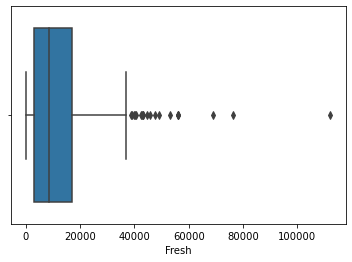

In [137]:
sns.boxplot(x=wholesale_data.Fresh)

(array([203., 108.,  65.,  29.,  15.,  10.,   3.,   4.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.]),
 array([3.00000000e+00, 7.47953333e+03, 1.49560667e+04, 2.24326000e+04,
        2.99091333e+04, 3.73856667e+04, 4.48622000e+04, 5.23387333e+04,
        5.98152667e+04, 6.72918000e+04, 7.47683333e+04, 8.22448667e+04,
        8.97214000e+04, 9.71979333e+04, 1.04674467e+05, 1.12151000e+05]),
 <BarContainer object of 15 artists>)

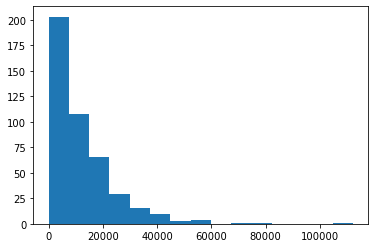

In [138]:
plt.hist(wholesale_data['Fresh'], 15)

In [139]:
# pmf
import scipy.stats
[a_fit, loc_fit, scale_fit] = scipy.stats.gamma.fit(wholesale_data['Fresh'])
print(a_fit)
print(loc_fit)
print(scale_fit)

1.0187699825003014
-13.139954587936899
9919.242980012346


<function matplotlib.pyplot.show(close=None, block=None)>

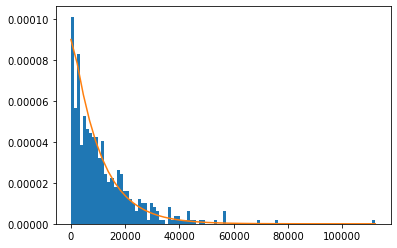

In [140]:
plt.hist(wholesale_data['Fresh'], bins=100, density=True)
x = np.linspace(np.min(wholesale_data['Fresh']), np.max(wholesale_data['Fresh']))
plt.plot(x, scipy.stats.gamma.pdf(x, a_fit, loc=loc_fit, scale=scale_fit),)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

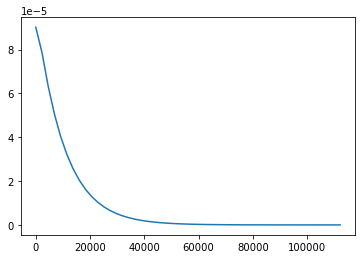

In [141]:
plt.plot(x, scipy.stats.gamma.pdf(x, a_fit, loc=loc_fit, scale=scale_fit),)
plt.show

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Milk'>

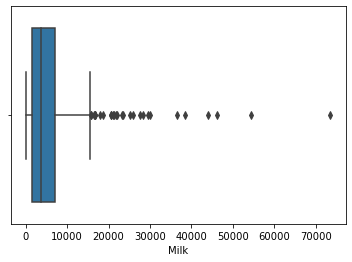

In [142]:
sns.boxplot(wholesale_data.Milk)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grocery'>

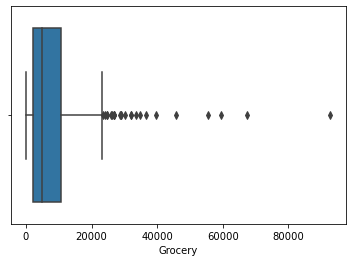

In [143]:
sns.boxplot(wholesale_data.Grocery)

(array([265., 108.,  36.,  11.,   8.,   4.,   2.,   2.,   1.,   1.,   0.,
          1.,   0.,   0.,   1.]),
 array([5.50000e+01, 4.95120e+03, 9.84740e+03, 1.47436e+04, 1.96398e+04,
        2.45360e+04, 2.94322e+04, 3.43284e+04, 3.92246e+04, 4.41208e+04,
        4.90170e+04, 5.39132e+04, 5.88094e+04, 6.37056e+04, 6.86018e+04,
        7.34980e+04]),
 <BarContainer object of 15 artists>)

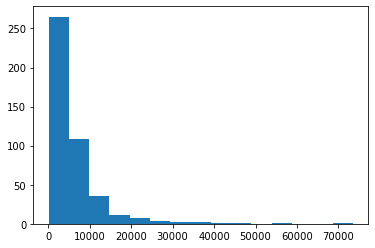

In [144]:
plt.hist(wholesale_data['Milk'], 15)

(array([255., 100.,  38.,  26.,  10.,   5.,   1.,   1.,   1.,   1.,   1.,
          0.,   0.,   0.,   1.]),
 array([3.00000000e+00, 6.18813333e+03, 1.23732667e+04, 1.85584000e+04,
        2.47435333e+04, 3.09286667e+04, 3.71138000e+04, 4.32989333e+04,
        4.94840667e+04, 5.56692000e+04, 6.18543333e+04, 6.80394667e+04,
        7.42246000e+04, 8.04097333e+04, 8.65948667e+04, 9.27800000e+04]),
 <BarContainer object of 15 artists>)

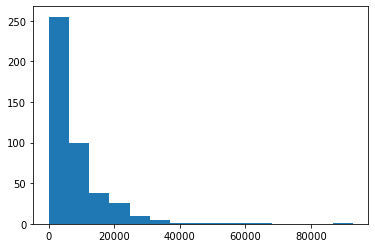

In [145]:
plt.hist(wholesale_data['Grocery'], 15)

(array([345.,  56.,  23.,   7.,   6.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   1.]),
 array([2.50000000e+01, 4.08126667e+03, 8.13753333e+03, 1.21938000e+04,
        1.62500667e+04, 2.03063333e+04, 2.43626000e+04, 2.84188667e+04,
        3.24751333e+04, 3.65314000e+04, 4.05876667e+04, 4.46439333e+04,
        4.87002000e+04, 5.27564667e+04, 5.68127333e+04, 6.08690000e+04]),
 <BarContainer object of 15 artists>)

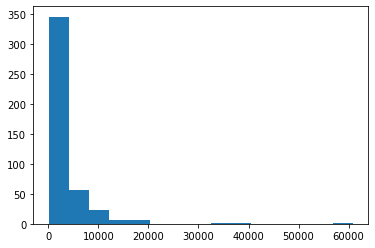

In [146]:
plt.hist(wholesale_data['Frozen'], 15)

(array([300.,  65.,  38.,  12.,  10.,   4.,   4.,   2.,   2.,   1.,   0.,
          0.,   0.,   1.,   1.]),
 array([3.00000e+00, 2.72460e+03, 5.44620e+03, 8.16780e+03, 1.08894e+04,
        1.36110e+04, 1.63326e+04, 1.90542e+04, 2.17758e+04, 2.44974e+04,
        2.72190e+04, 2.99406e+04, 3.26622e+04, 3.53838e+04, 3.81054e+04,
        4.08270e+04]),
 <BarContainer object of 15 artists>)

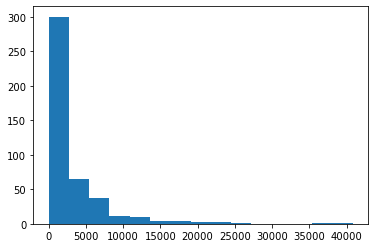

In [147]:
plt.hist(wholesale_data['Detergents_Paper'], 15)

Text(0.5, 0, 'Delicatessen Numbers')

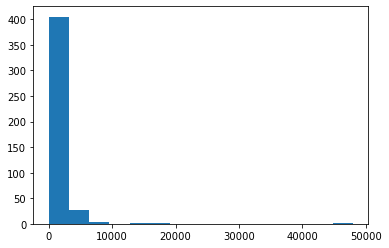

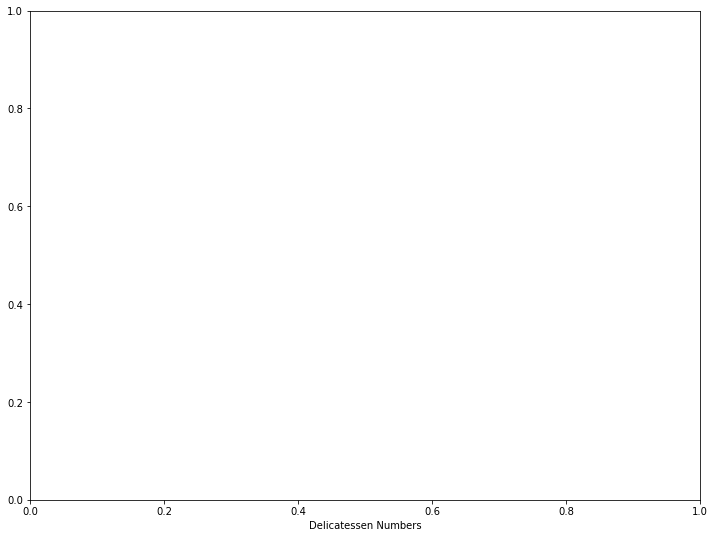

In [148]:
plt.hist(wholesale_data['Delicatessen'], 15)
plt.figure(figsize = (12,9))
plt.xlabel('Delicatessen Numbers')

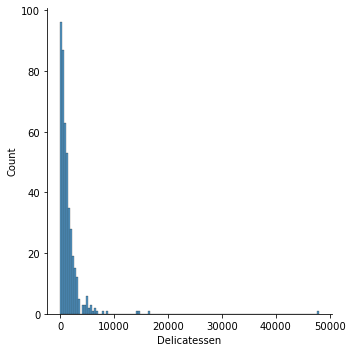

In [149]:
sns.displot(wholesale_data['Delicatessen'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delicatessen', ylabel='Density'>

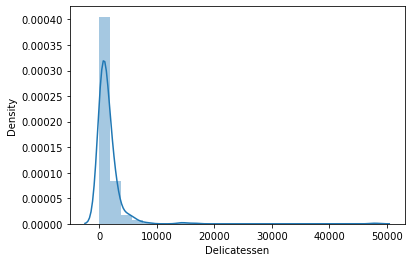

In [150]:
sns.distplot(wholesale_data['Delicatessen'], bins = 25)


array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicatessen'}>, <AxesSubplot:>]],
      dtype=object)

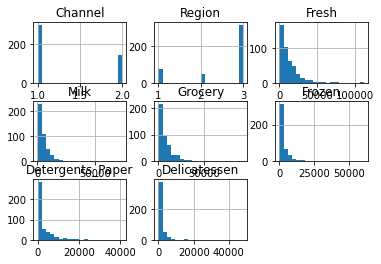

In [151]:
wholesale_data.hist(bins = 20)

In [152]:
channel_dist = wholesale_data.groupby('Channel')

In [153]:
channel_dist

In [154]:
region_dist = wholesale_data.groupby('Region').size()

In [155]:
region_dist

Region
1     77
2     47
3    316
dtype: int64

In [156]:
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [157]:
fresh_cor = wholesale_data.corr()['Fresh'][:-1]

In [158]:
fresh_cor

Channel            -0.169172
Region              0.055287
Fresh               1.000000
Milk                0.100510
Grocery            -0.011854
Frozen              0.345881
Detergents_Paper   -0.101953
Name: Fresh, dtype: float64

In [159]:
%autosave 180

Autosaving every 180 seconds


<AxesSubplot:>

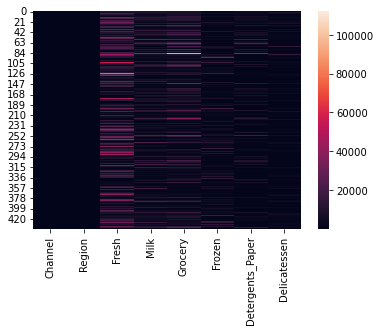

In [160]:
sns.heatmap(wholesale_data)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fresh', ylabel='Milk'>

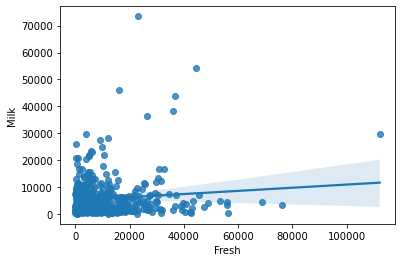

In [161]:
sns.regplot(wholesale_data['Fresh'],  wholesale_data['Milk'])

In [162]:
%autosave 160

Autosaving every 160 seconds


In [163]:
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


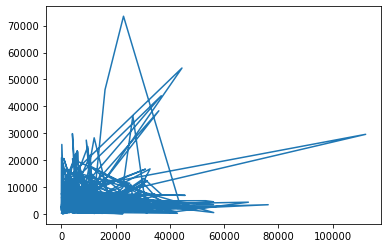

In [164]:
plt.plot(wholesale_data.Fresh, wholesale_data.Milk)
plt.show()

In [165]:
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [166]:
print("Hello")

Hello


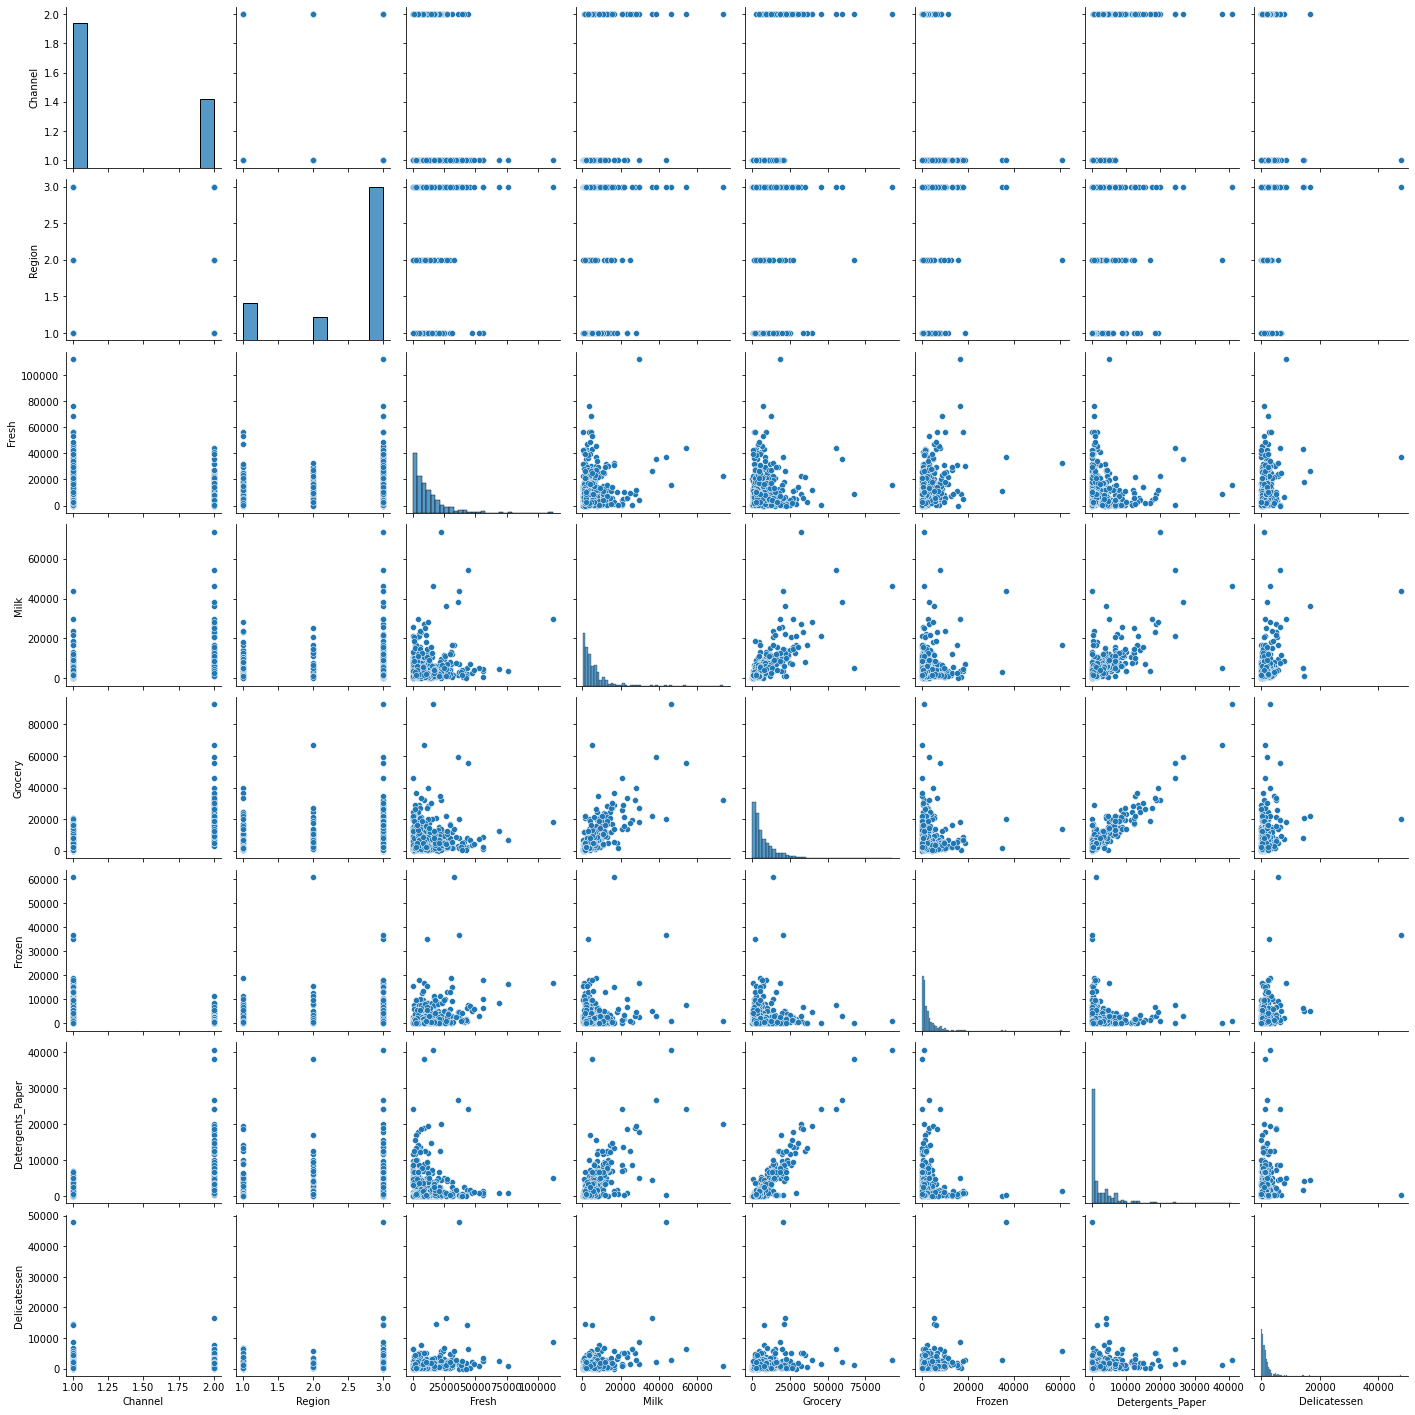

In [167]:
sns.pairplot(wholesale_data)

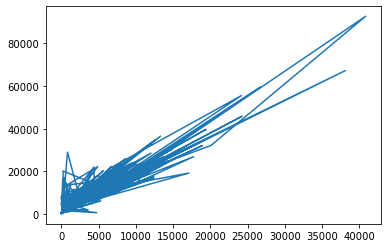

In [168]:
plt.plot(wholesale_data.Detergents_Paper, wholesale_data.Grocery)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Detergents_Paper', ylabel='Grocery'>

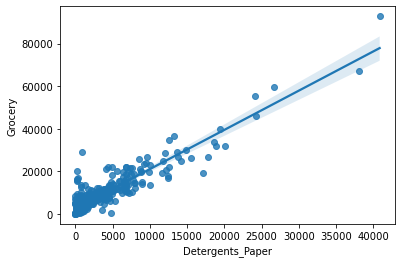

In [169]:
sns.regplot(wholesale_data.Detergents_Paper, wholesale_data.Grocery)

#  Multiple Linear Regression

In [170]:
import statsmodels.formula.api as smf

In [171]:
wholesale_data.iloc[:, 0:8].head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [172]:
print(wholesale_data.__doc__)


    Two-dimensional, size-mutable, potentially heterogeneous tabular data.

    Data structure also contains labeled axes (rows and columns).
    Arithmetic operations align on both row and column labels. Can be
    thought of as a dict-like container for Series objects. The primary
    pandas data structure.

    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, dataclass or list-like objects. If
        data is a dict, column order follows insertion-order. If a dict contains Series
        which have an index defined, it is aligned by its index.

        .. versionchanged:: 0.25.0
           If data is a list of dicts, column order follows insertion-order.

    index : Index or array-like
        Index to use for resulting frame. Will default to RangeIndex if
        no indexing information part of input data and no index provided.
    columns : Index or array-like
        Column

In [173]:
slr_Grocery = smf.ols(formula='Grocery ~ Detergents_Paper', data=wholesale_data)

In [174]:
results = slr_Grocery.fit()

In [175]:
results.params

Intercept           2640.772792
Detergents_Paper       1.842970
dtype: float64

In [176]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Grocery   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     2582.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          9.56e-186
Time:                        18:09:38   Log-Likelihood:                -4229.2
No. Observations:                 440   AIC:                             8462.
Df Residuals:                     438   BIC:                             8471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2640.7728    201.892     13.080      0.000    2243.976    3037.570
Detergents_Paper     1.8430      0.036     50.812      0.000       1.772       1.914
==============================================================================
Omnibus:                      190.986   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1474.278
Skew:                           1.680   Prob(JB):                         0.00
Kurtosis:                      11.314   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$\hat{Grocery} = \hat{\beta}_{0} + \hat{\beta}_{1}Fresh + \hat{\beta}_{2}Milk + \hat{\beta}_{3}Frozen + \hat{\beta}_{4}Detergents_Paper + \hat{\beta}_{5}Delicatessen $$

In [177]:
mlr_Grocery = smf.ols(formula="Grocery ~ Fresh + Milk + Frozen + Detergents_Paper + Delicatessen", data=wholesale_data)

In [178]:
results = mlr_Grocery.fit()

In [179]:
results.params

Intercept           1342.524064
Fresh                  0.027397
Milk                   0.184534
Frozen                 0.015863
Detergents_Paper       1.652724
Delicatessen           0.261876
dtype: float64

In [180]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Grocery   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     676.6
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          2.57e-202
Time:                        18:09:38   Log-Likelihood:                -4175.6
No. Observations:                 440   AIC:                             8363.
Df Residuals:                     434   BIC:                             8388.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1342.5241    247.965      5.414      0.000     855.162    1829.886
Fresh                0.0274      0.013      2.080      0.038       0.002       0.053
Milk                 0.1845      0.032      5.753      0.000       0.121       0.248
Frozen               0.0159      0.036      0.436      0.663      -0.056       0.087
Detergents_Paper     1.6527      0.046     35.717      0.000       1.562       1.744
Delicatessen         0.2619      0.066      3.963      0.000       0.132       0.392
==============================================================================
Omnibus:                      165.192   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1988.121
Skew:                           1.253   Prob(JB):                         0.00
Kurtosis:                      13.108   Cond. No.                     3.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  Logistic Regression to Predict Region

In [181]:
formula='Region ~ Grocery + Milk + Frozen + Fresh + Detergents_Paper + Delicatessen'
model = smf.mnlogit(formula, data=wholesale_data)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 0.764758
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Region   No. Observations:                  440
Model:                        MNLogit   Df Residuals:                      426
Method:                           MLE   Df Model:                           12
Date:                Mon, 14 Nov 2022   Pseudo R-squ.:                 0.02164
Time:                        18:09:38   Log-Likelihood:                -336.49
converged:                       True   LL-Null:                       -343.94
Covariance Type:            nonrobust   LLR p-value:                    0.2478
====================================================================================
        Region=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4515      0.327     -1.380      0.167      -1.093       0.190
Grocery           3.632e-05      6e-05      0.605      0.545   -8.13e-05       0.000
Milk             -7.613e-05   5.32e-05     -1.431      0.152      -0.000    2.81e-05
Frozen            5.868e-05   3.62e-05      1.622      0.105   -1.22e-05       0.000
Fresh            -1.168e-05   1.93e-05     -0.607      0.544   -4.94e-05     2.6e-05
Detergents_Paper  4.442e-05      0.000      0.404      0.686      -0.000       0.000
Delicatessen        -0.0001      0.000     -0.746      0.456      -0.000       0.000
------------------------------------------------------------------------------------
        Region=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2665      0.221      5.738      0.000       0.834       1.699
Grocery           1.712e-06   4.08e-05      0.042      0.966   -7.82e-05    8.16e-05
Milk               1.48e-06   3.03e-05      0.049      0.961   -5.79e-05    6.09e-05
Frozen           -2.166e-05   3.23e-05     -0.670      0.503    -8.5e-05    4.17e-05
Fresh             1.029e-05   1.19e-05      0.868      0.386    -1.3e-05    3.35e-05
Detergents_Paper  1.957e-06   7.91e-05      0.025      0.980      -0.000       0.000
Delicatessen      4.177e-05   7.28e-05      0.574      0.566      -0.000       0.000
====================================================================================
"""

#  Use Model to Predict Percent of Each Region if 8000 m.u. were Spent on Each Item

In [182]:
columns = ['Grocery', 'Milk', 'Frozen', 'Fresh', 'Detergents_Paper', 'Delicatessen']
new = pd.DataFrame([[8000, 8000, 8000, 8000, 8000, 8000]], columns=columns)
results.predict(new)


,0,1,2
0,0.164577,0.059285,0.776138


#  Predict Region when 0 m.u.  Spent

In [183]:
columns = ['Grocery', 'Milk', 'Frozen', 'Fresh', 'Detergents_Paper', 'Delicatessen']
new = pd.DataFrame([[0, 0, 0, 0, 0, 0]], columns=columns)
results.predict(new)

,0,1,2
0,0.192861,0.122788,0.68435


In [184]:
wholesale_data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

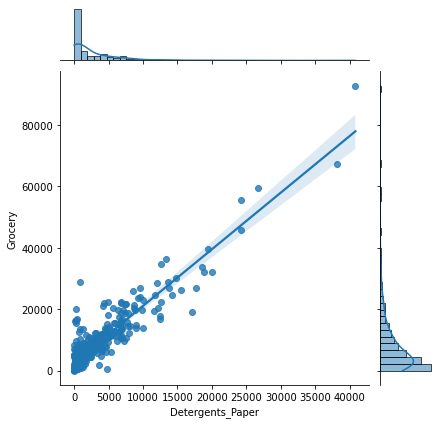

In [185]:
sns.jointplot(x='Detergents_Paper', y='Grocery', data=wholesale_data, kind='reg')

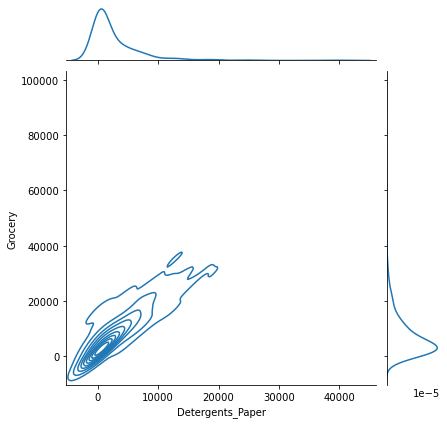

In [186]:
sns.jointplot(x='Detergents_Paper', y='Grocery', data=wholesale_data, kind='kde')

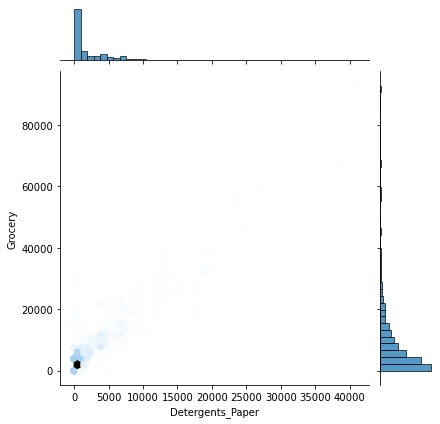

In [187]:
sns.jointplot(x='Detergents_Paper', y='Grocery', data=wholesale_data, kind='hex')

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Density'>

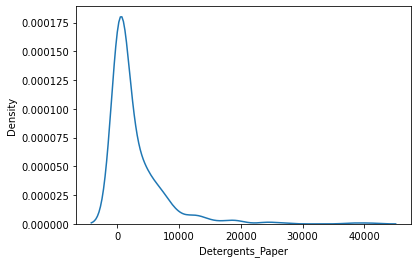

In [188]:
sns.kdeplot(wholesale_data['Detergents_Paper'])

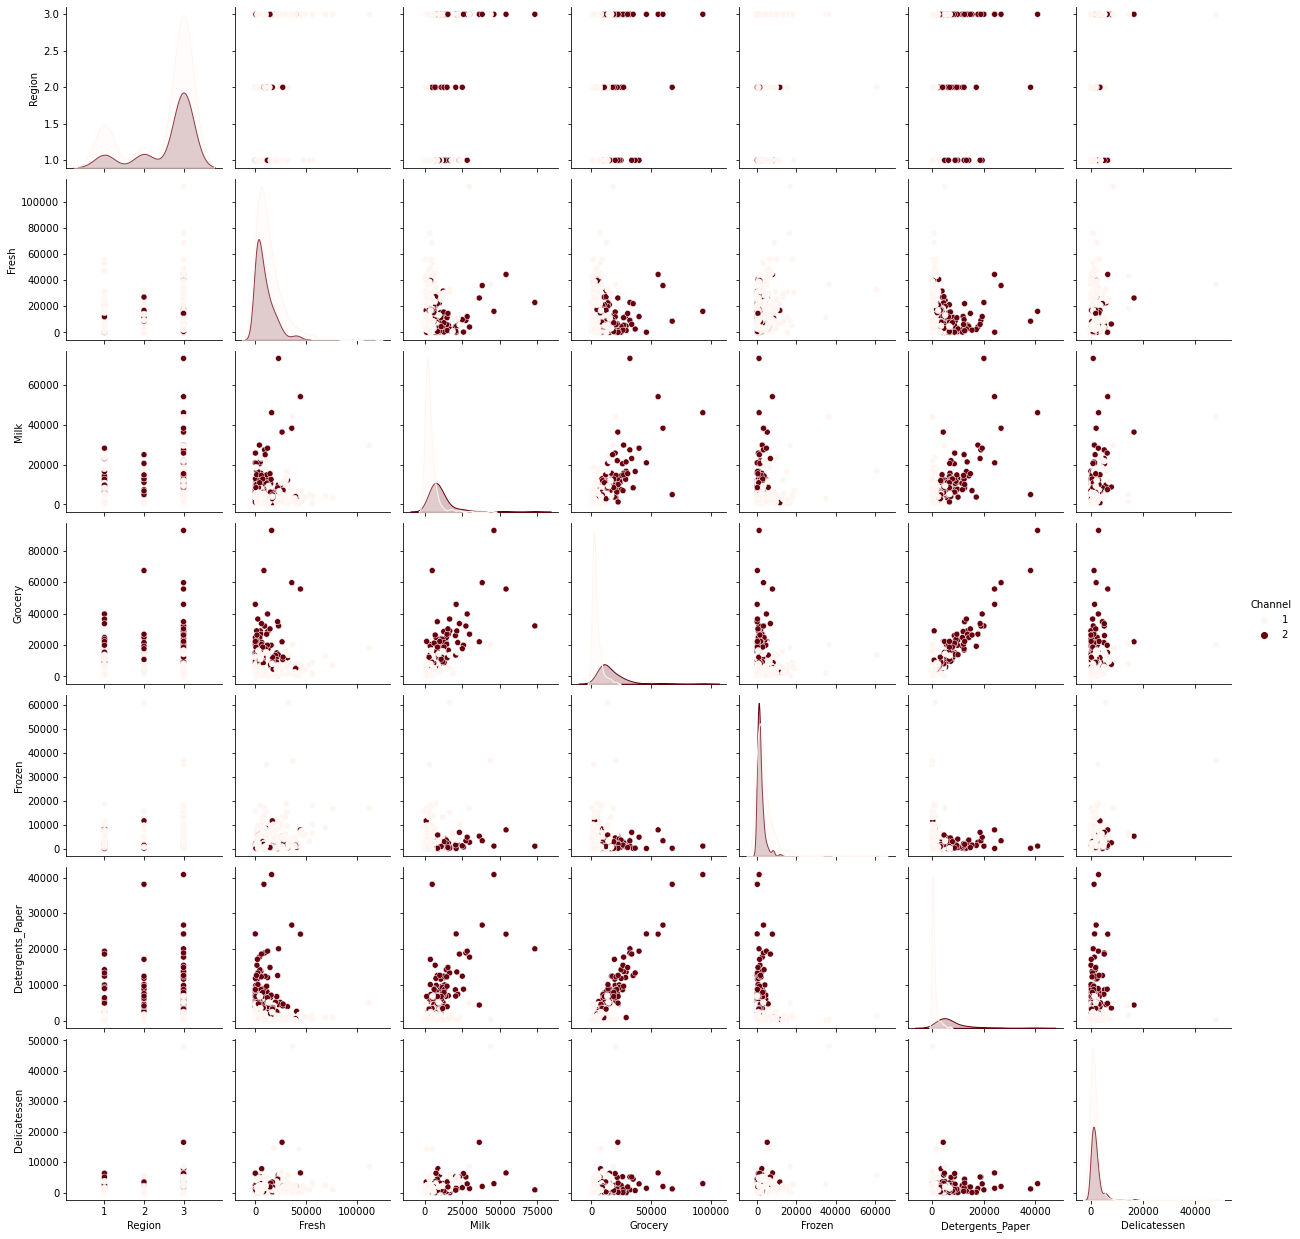

In [189]:
sns.pairplot(wholesale_data, hue='Channel', palette='Reds')

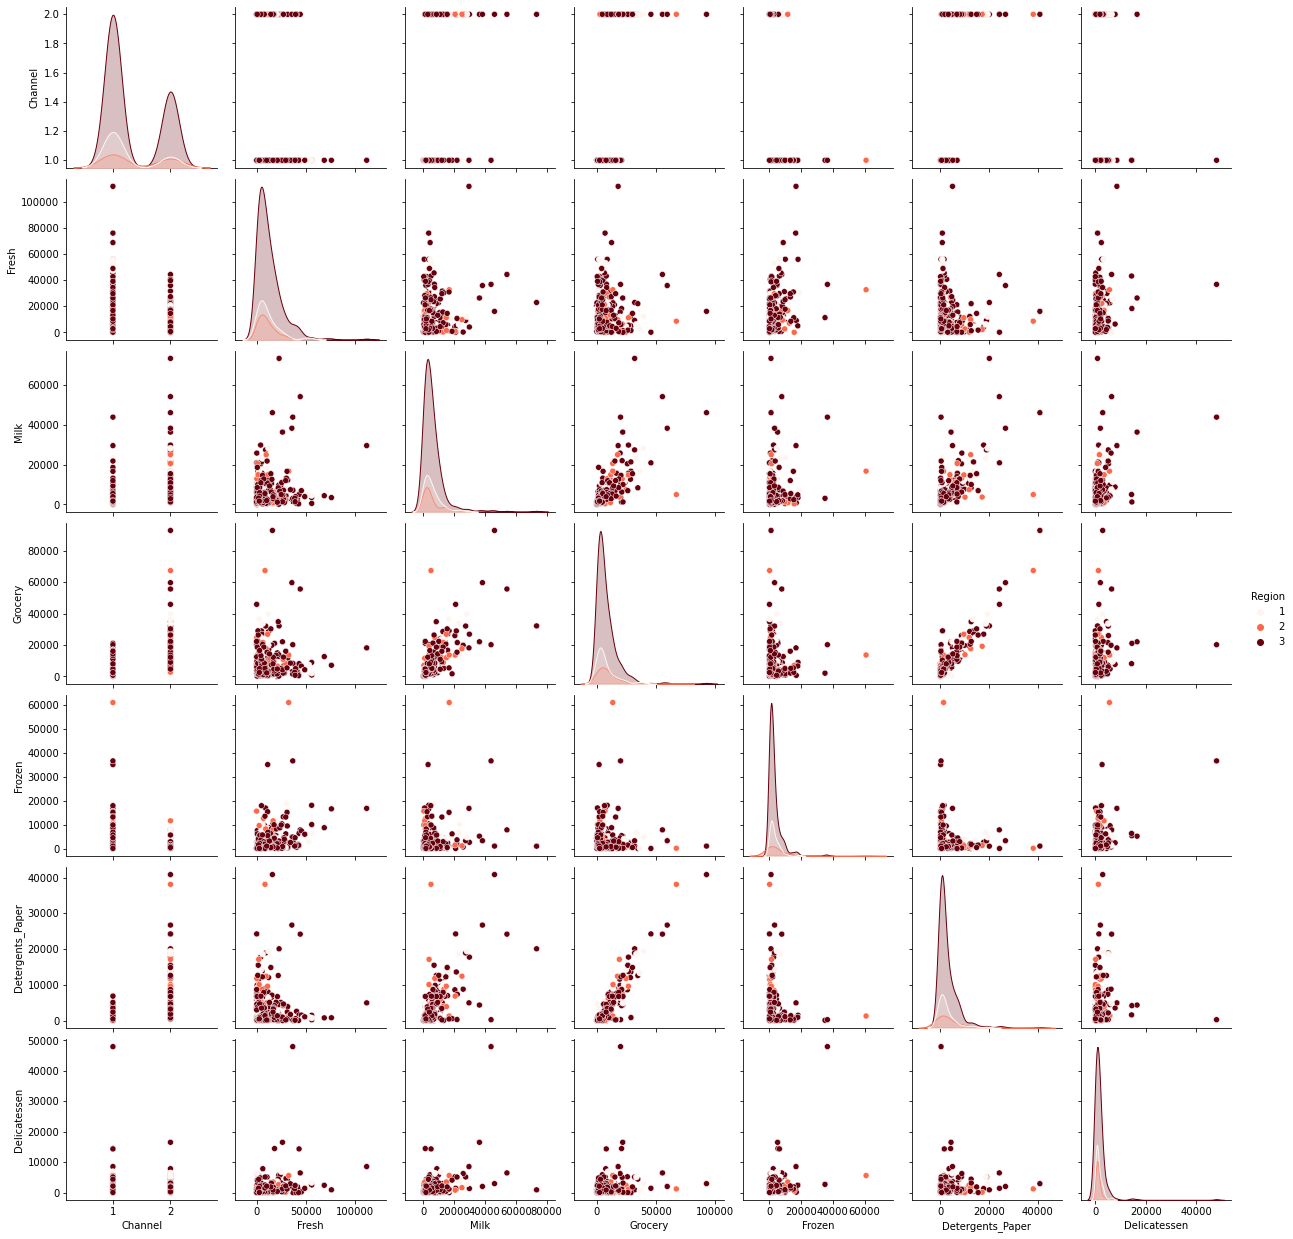

In [190]:
sns.pairplot(wholesale_data, hue='Region', palette='Reds')

<AxesSubplot:xlabel='Grocery'>

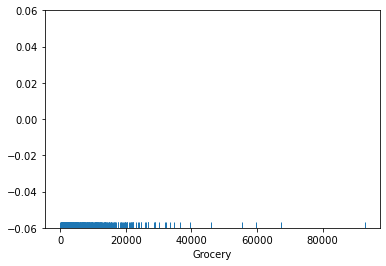

In [191]:
sns.rugplot(wholesale_data['Grocery'])

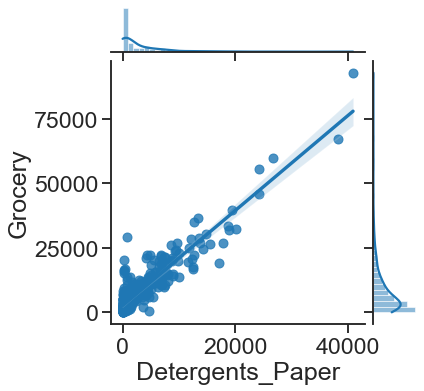

In [192]:
sns.set_style('ticks')
sns.set_context('talk', font_scale=1.4)
sns.jointplot(x='Detergents_Paper', y='Grocery', data=wholesale_data, kind='reg')

#  Calculate Pearson's correlation coefficient for Grocery, Detergents_Paper

In [193]:

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [194]:
import numpy as np
import thinkstats2
import thinkplot

In [195]:
# Define function to compute covariance (a measure of the 
# tendency of two variables to vary together) in order to
# create function to calculate Pearson's correlation.
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

# Define function to calculate Pearson's correlation
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

# Print out Pearson's correlation
print('Corr', Corr(wholesale_data.Grocery, wholesale_data.Detergents_Paper))


Corr 0.9246406908542677


# Compare with Spearman's rank for Grocery, Detergents_Paper

In [196]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [197]:
import pandas as pd
print('SpearmanCorr', SpearmanCorr(wholesale_data.Grocery, wholesale_data.Detergents_Paper))


SpearmanCorr 0.8012817065510774


#  Kendall's tau for Grocery, Detergents_Paper

In [198]:
tau, p_value = stats.kendalltau(wholesale_data.Grocery, wholesale_data.Detergents_Paper)
tau, p_value 

(0.6323818020095053, 2.199971934720656e-87)

#  Pearson's correlation for Grocery, Milk

In [199]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

# Define function to calculate Pearson's correlation
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

# Print out Pearson's correlation
print('Corr', Corr(wholesale_data.Grocery, wholesale_data.Milk))


Corr 0.728335118153645


#  Spearman's Rank for Grocery, Milk

In [200]:
print('SpearmanCorr', SpearmanCorr(wholesale_data.Grocery, wholesale_data.Milk))

SpearmanCorr 0.7730485114172712


#  Pearson's Correlation for Milk, Detergents_Paper

In [201]:
print('Corr', Corr(wholesale_data.Detergents_Paper, wholesale_data.Milk))

Corr 0.661815679359107


#   Spearman's Rank for Detergents_Paper, Milk

In [202]:
print('SpearmanCorr', SpearmanCorr(wholesale_data.Detergents_Paper, wholesale_data.Milk))

SpearmanCorr 0.6799790790307958


#   Pearson's Correlation for Milk, Delicatessen

In [203]:
print('Corr', Corr(wholesale_data.Delicatessen, wholesale_data.Milk))

Corr 0.4063683161768716


#  Spearman's Rank for Delicatessen, Milk. Compare Downey's function to scipy.stats

In [204]:
print('SpearmanCorr', SpearmanCorr(wholesale_data.Delicatessen, wholesale_data.Milk))

SpearmanCorr 0.37277052318937987


In [205]:
from scipy import stats
print('SpearmanResult', stats.spearmanr(wholesale_data.Delicatessen, wholesale_data.Milk))

SpearmanResult SpearmanrResult(correlation=0.3727705231893799, pvalue=5.942140822073283e-16)


#  Pearson's Correlation for Milk, Fresh

In [206]:
print('Corr', Corr(wholesale_data.Fresh, wholesale_data.Milk))

Corr 0.1005097682998585


#  Spearman's Rank for Fresh, Milk in scipy

In [207]:
 stats.spearmanr(wholesale_data.Fresh, wholesale_data.Milk)

SpearmanrResult(correlation=-0.08392084747135176, pvalue=0.07867368476993189)

#  Kendall's tau from scipy

In [208]:
tau, p_value = stats.kendalltau(wholesale_data.Fresh, wholesale_data.Milk)

In [209]:
tau, p_value

(-0.053144449034412136, 0.0958523229436029)

<AxesSubplot:xlabel='Region', ylabel='Grocery'>

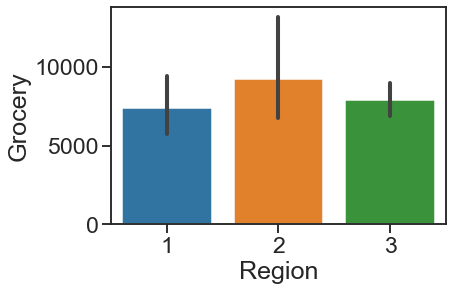

In [210]:
sns.barplot(x='Region', y='Grocery', data=wholesale_data)

<AxesSubplot:xlabel='Region', ylabel='count'>

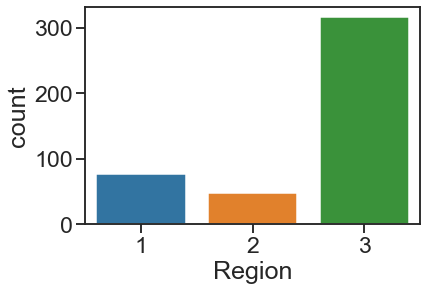

In [211]:
sns.countplot(x='Region', data=wholesale_data)

<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

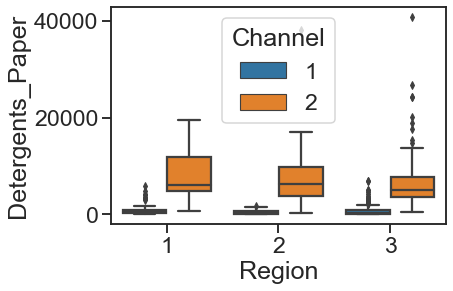

In [212]:
sns.boxplot(x='Region',y='Detergents_Paper', data=wholesale_data, hue='Channel')

<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

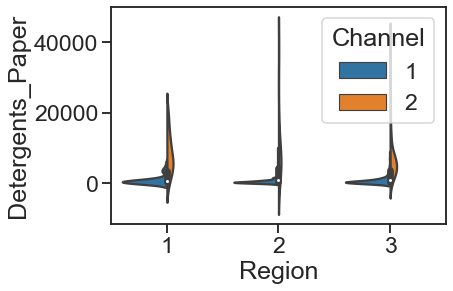

In [213]:
sns.violinplot(x='Region',y='Detergents_Paper', data=wholesale_data, hue='Channel', split=True)

<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

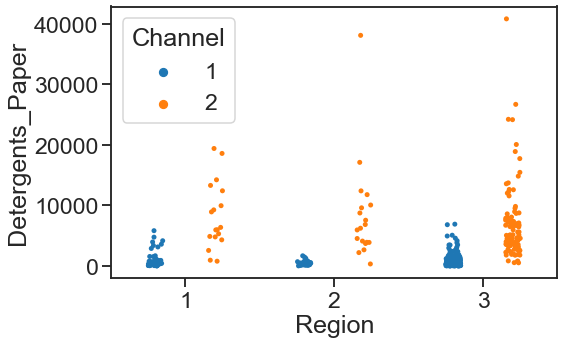

In [214]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Region',y='Detergents_Paper', data=wholesale_data, jitter=True, hue='Channel', dodge=True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

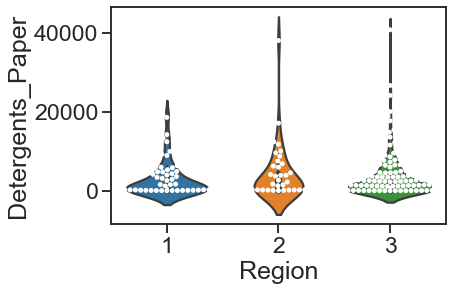

In [215]:
sns.violinplot(x='Region',y='Detergents_Paper', data=wholesale_data)
sns.swarmplot(x='Region',y='Detergents_Paper', data=wholesale_data, color='white')

<AxesSubplot:>

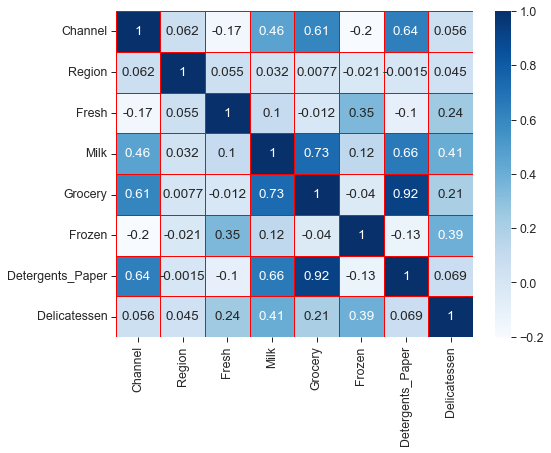

In [216]:
wholesale_mx = wholesale_data.corr()
wholesale_mx
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(wholesale_mx, annot=True, cmap='Blues', linecolor='red', linewidth=1)

In [217]:
!pip install pingouin

#  Explore Partial Correlations

In [218]:
import pingouin as pg

In [219]:
wholesale_data.pcorr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,1.000000,0.079543,-0.124533,0.077698,0.074792,-0.150394,0.180918,0.032930
Region,0.079543,1.000000,0.065810,0.018816,-0.009089,-0.046719,-0.023075,0.033267
Fresh,-0.124533,0.065810,1.000000,0.073129,0.107651,0.230618,-0.120829,0.065669
Milk,0.077698,0.018816,0.073129,1.000000,0.258816,0.085752,0.095156,0.330820
Grocery,0.074792,-0.009089,0.107651,0.258816,1.000000,0.031662,0.833574,0.183803
Frozen,-0.150394,-0.046719,0.230618,0.085752,0.031662,1.000000,-0.069474,0.279455
Detergents_Paper,0.180918,-0.023075,-0.120829,0.095156,0.833574,-0.069474,1.000000,-0.258583
Delicatessen,0.032930,0.033267,0.065669,0.330820,0.183803,0.279455,-0.258583,1.000000


In [220]:
pg.partial_corr(data=wholesale_data, x='Detergents_Paper', y='Grocery', covar='Milk')

,n,r,CI95%,p-val
pearson,440,0.861647,"[0.84, 0.88]",8.403587e-131


In [221]:
pg.partial_corr(data=wholesale_data, x='Detergents_Paper', y='Grocery', covar='Milk', method = 'spearman')

,n,r,CI95%,p-val
spearman,440,0.592585,"[0.53, 0.65]",5.746998e-43


In [222]:
pg.partial_corr(data=wholesale_data, x='Detergents_Paper', y='Grocery', covar=['Milk','Fresh'], method = 'spearman')

,n,r,CI95%,p-val
spearman,440,0.589044,"[0.52, 0.65]",2.917289e-42


In [223]:
pg.partial_corr(data=wholesale_data, x='Detergents_Paper', y='Grocery', covar=['Milk', 'Fresh', 'Frozen', 'Delicatessen'], method = 'spearman')

,n,r,CI95%,p-val
spearman,440,0.58576,"[0.52, 0.64]",1.616454e-41


In [224]:
pg.partial_corr(data=wholesale_data, x='Detergents_Paper', y='Milk', covar='Grocery')

C:\Users\Admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,n,r,CI95%,p-val
pearson,440,-0.044576,"[-0.14, 0.05]",0.351453


In [225]:
pg.partial_corr(data=wholesale_data, x='Detergents_Paper', y='Milk', covar='Grocery', method = 'spearman')

,n,r,CI95%,p-val
spearman,440,0.159541,"[0.07, 0.25]",0.000794


In [226]:
#Region = wholesale_data.pop('Region')
#sns.clustermap(wholesale_data)

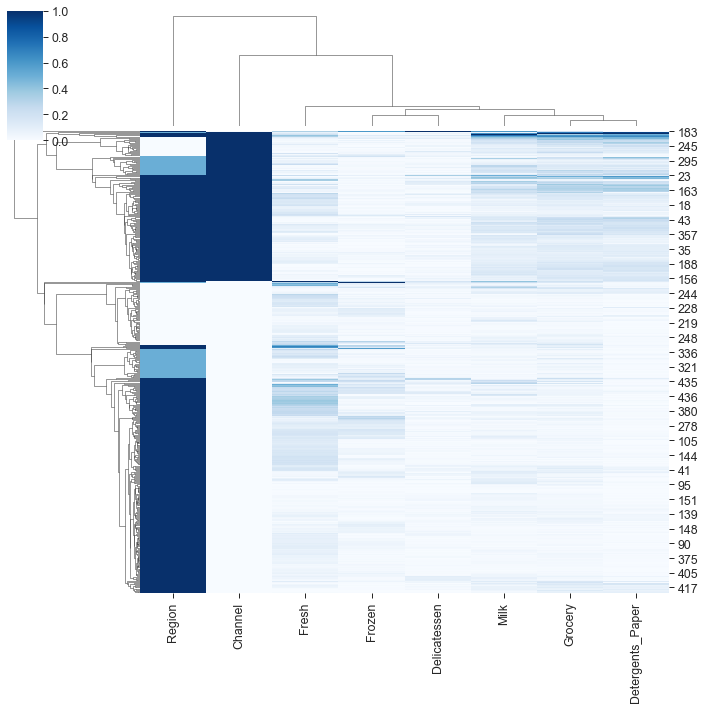

In [227]:
sns.clustermap(wholesale_data, cmap='Blues', standard_scale=1)

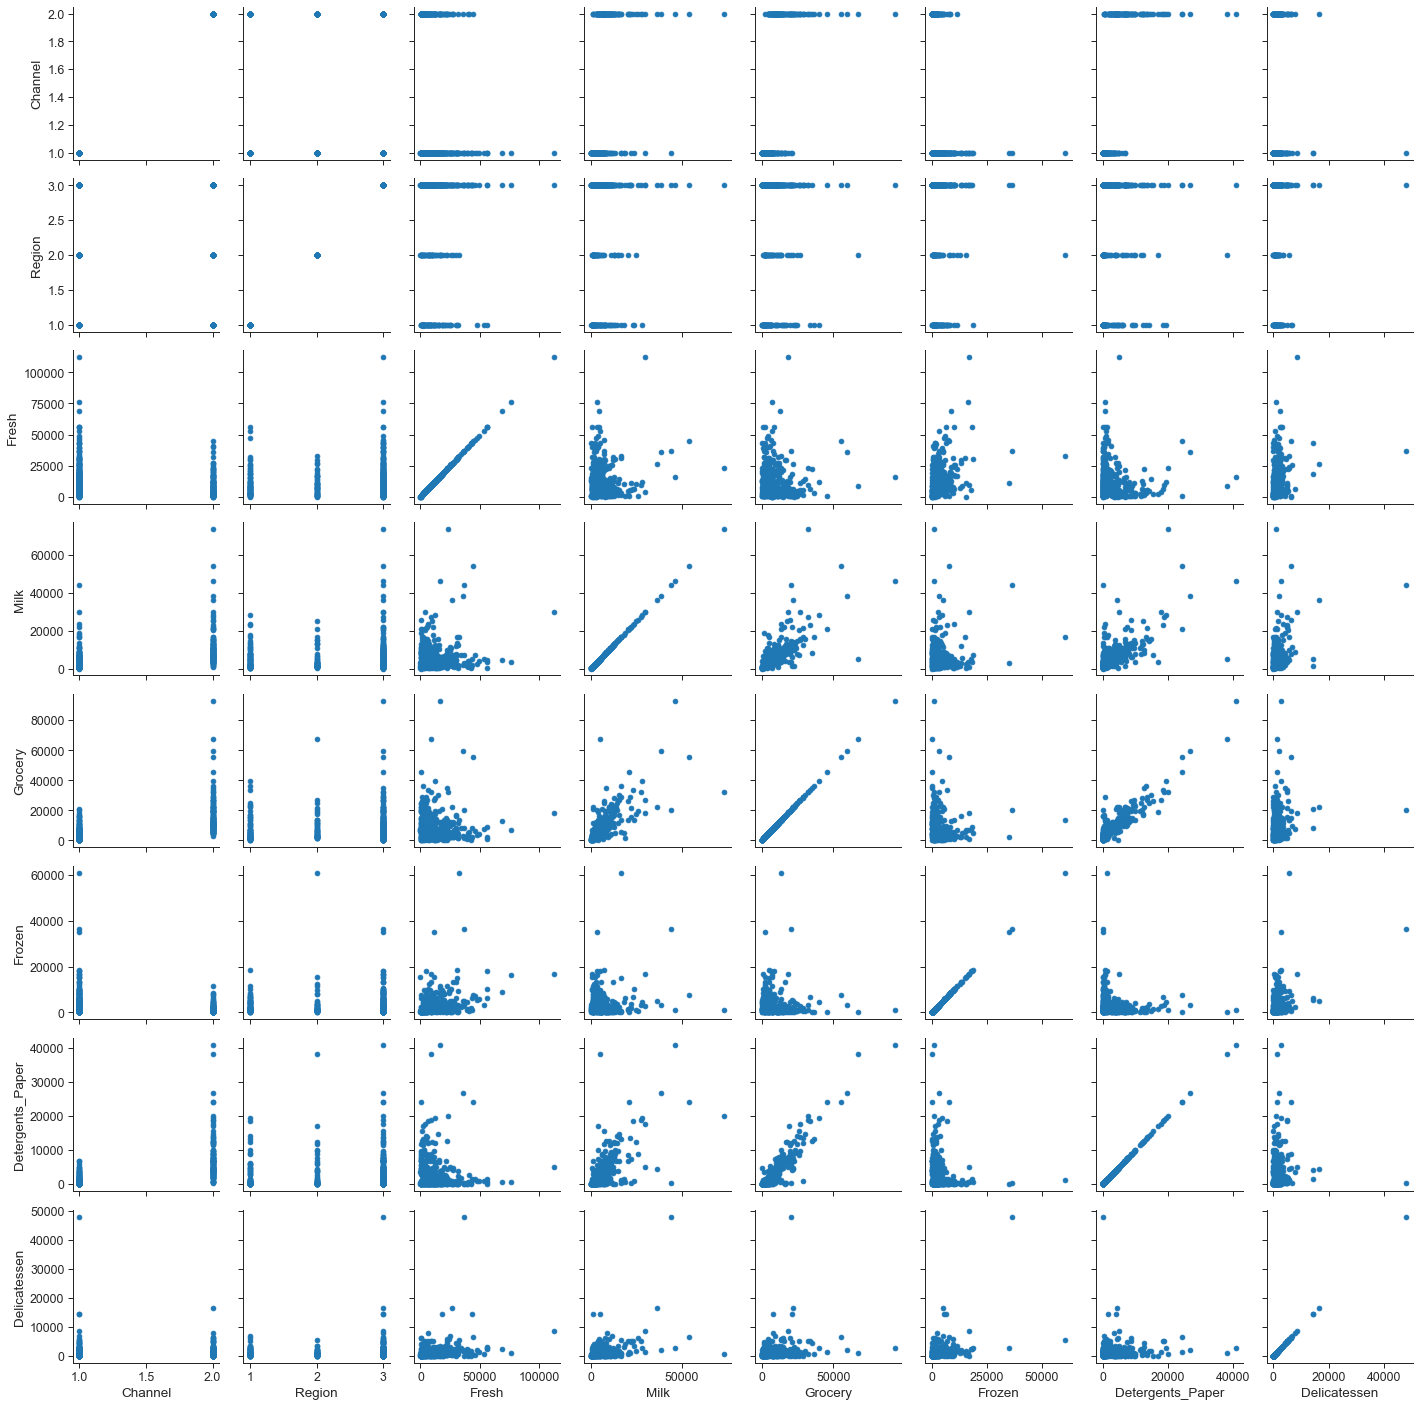

In [228]:
wholesale_grid = sns.PairGrid(wholesale_data)
wholesale_grid.map(plt.scatter)

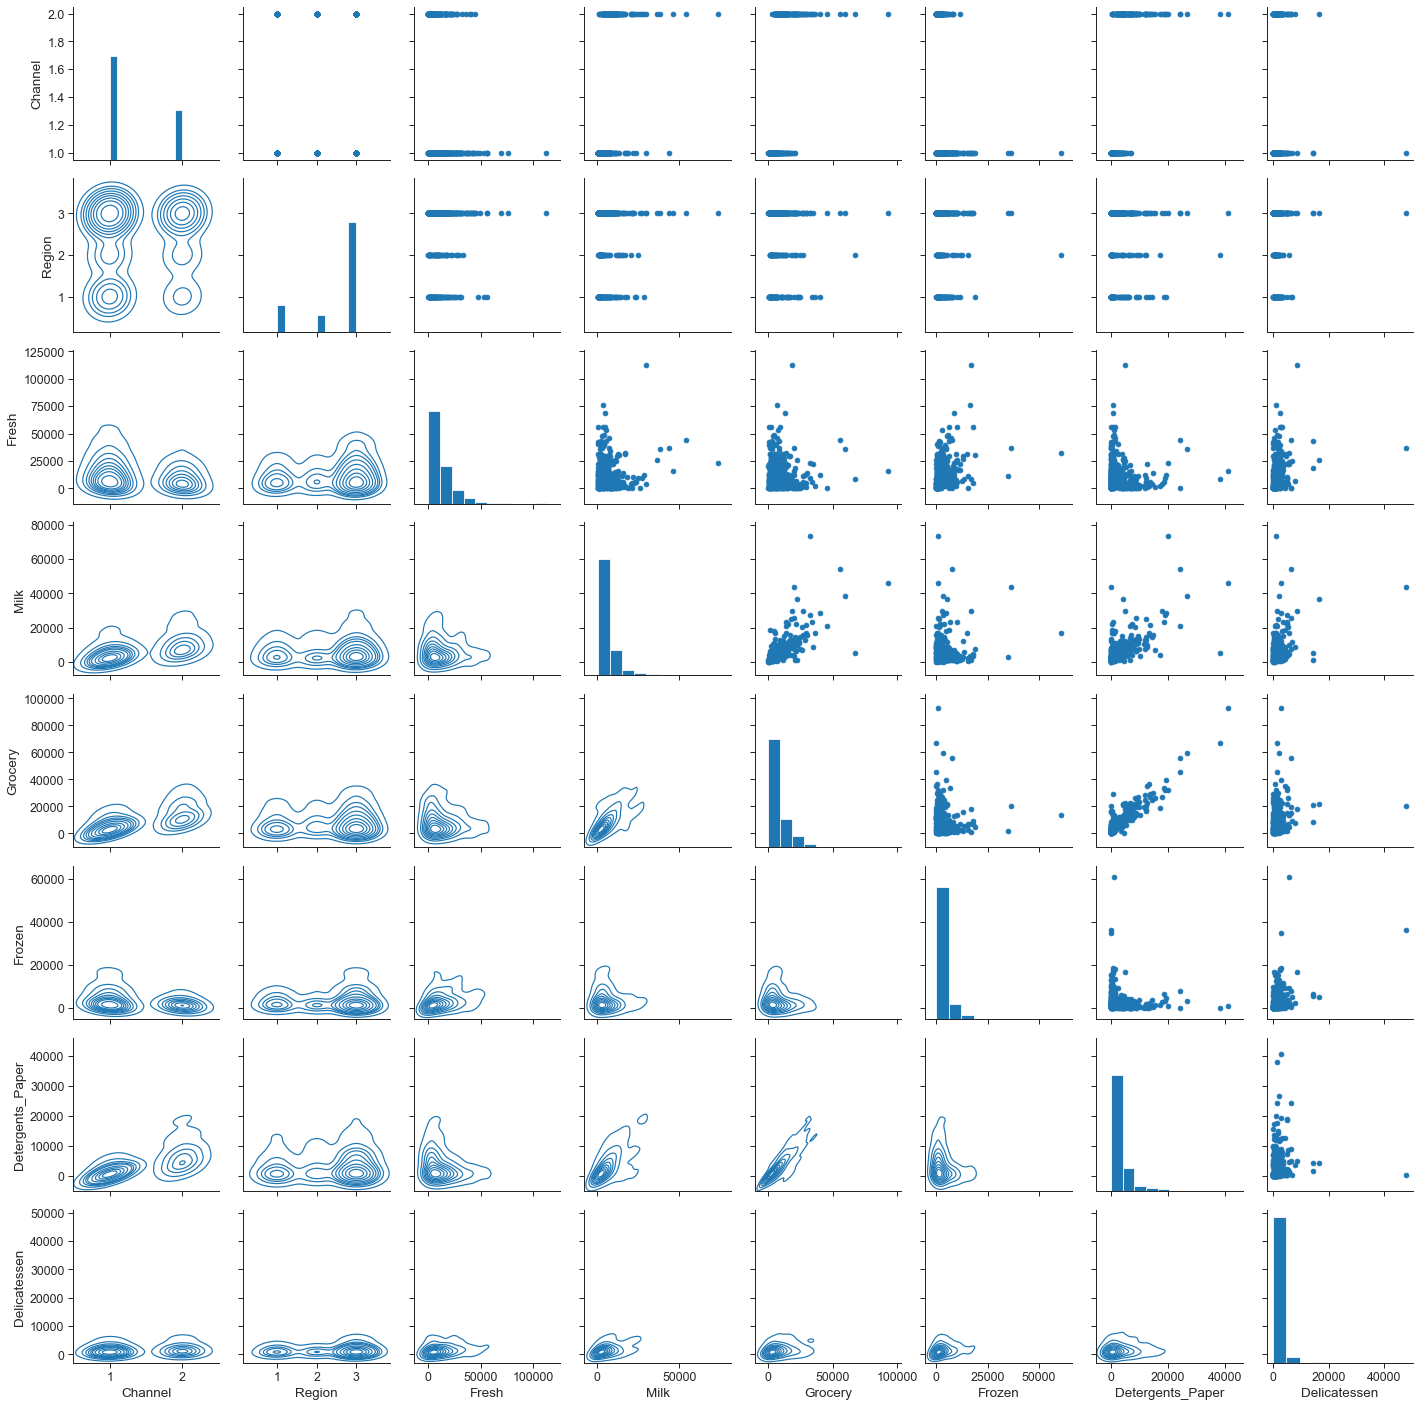

In [229]:
wholesale_grid = sns.PairGrid(wholesale_data)
wholesale_grid.map_diag(plt.hist)
wholesale_grid.map_upper(plt.scatter)
wholesale_grid.map_lower(sns.kdeplot)

In [230]:
wholesale_data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<Figure size 576x432 with 0 Axes>

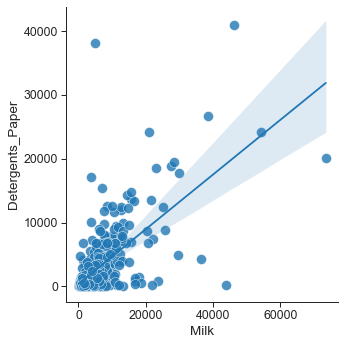

In [231]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Milk', y='Detergents_Paper', data=wholesale_data,
           scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor':'w'})


In [232]:
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [233]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 47.1 KB


# Create PMF for Region

In [234]:
num_per_region = wholesale_data.Region.value_counts()
num_per_region

3    316
1     77
2     47
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

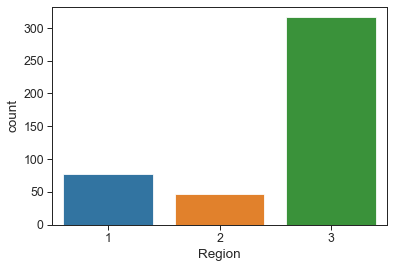

In [235]:
sns.countplot(x='Region', data=wholesale_data)

In [236]:
type(num_per_region)

pandas.core.series.Series

In [237]:
df_num_per_region = pd.DataFrame(num_per_region)
df_num_per_region

,Region
3,316
1,77
2,47


In [238]:
df_counts = df_num_per_region.iloc[:, 0].value_counts()
df_counts

316    1
77     1
47     1
Name: Region, dtype: int64

In [239]:
sum_1 = len(df_num_per_region)
sum_1

3

In [240]:
df1 = pd.DataFrame(df_counts)
df1

,Region
316,1
77,1
47,1


In [241]:
df1 = df1.rename(columns = {0:'Item Counts'}, inplace = True)
df1

In [242]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [243]:
skew(wholesale_data.Fresh), kurtosis(wholesale_data.Fresh)

(2.5525826879071585, 11.392123947034221)

In [244]:
skew(wholesale_data.Frozen), kurtosis(wholesale_data.Frozen)

(5.887825728957787, 54.05618035816968)

In [245]:
skew(wholesale_data.Detergents_Paper), kurtosis(wholesale_data.Detergents_Paper)

(3.6194575783115934, 18.78052846649548)

In [246]:
skew(wholesale_data.Delicatessen), kurtosis(wholesale_data.Delicatessen)

(11.113533648709097, 168.7477805064442)

In [247]:
skew(wholesale_data.Milk), kurtosis(wholesale_data.Milk)

(4.039922122788577, 24.37634877176706)

In [248]:
skew(wholesale_data.Grocery), kurtosis(wholesale_data.Grocery)


(3.5751872200807875, 20.664153228293365)

In [249]:
from scipy.stats import kurtosis

In [250]:
kurtosis(wholesale_data.Grocery)

20.664153228293365

In [251]:
0.9246406908542677**2

0.8549604071834574

#                                                                  Consumer Products 

I will explore the relationship between grocery products and detergents and paper. I posit that the more consumers buy groceries, the more they must buy detergents and paper. If proven true, I could then track my grocery spending and use it to predict my detergents and paper products needs. This dataset tracks consumer spending in Portugal. The data is divided amongst regions. Lisbon and Porto are both on the coast. With a population of 550,000, Lisbon is more than double the size of Porto. The preponderance of data comes from other areas. It tracks the spending on varied consumer products. The data, as is evident from the graphs, is clearly not normally distributed. The Jarque-Bera test statistic is 1988.121 with a prob = 0.00.  The skewness values of the variables are generally greater than 3, and the kurtosis exceeds 10. 

At first glance, the Peason’s correlation between grocery products and detergent and paper products shows a high correlation of 0.925. However, the data is not normally distributed. The boxplots, scatterplots, cdfs, pdfs, and summary statistics clearly show a positive, right skew. Spearman’s rank still shows a strong correlation of 0.801. Kendall’s tau confirms this with a correlation of 0.632 and a p-value of 2.2* 10^-87. The assorted consumer product spending follows a general pattern: most of the data points of spending are bunched towards 0, and singular points are manifest as one goes further to the right, the higher spending. There are no null values to contend with. The predominance of outliers throughout the dataset exists in the right tails. There is no suggestion that these outliers are mistaken input values. They seem to tell the narrative that consumers will sometimes spend a disproportionate amount of money on any of the items. Each product category displays this behaviour, albeit to varying degrees.  

A partial correlation controls for other variables. Running a partial correlation between grocery and detergents and paper with milk as a control and using the ‘spearman’ method, produces an output of r=0.592583 and a p-value=5.746998e-43. Controlling for all the other variables produces r=0.58576 and p-value=1.616e-41, which is slightly lower than controlling for only one variable. A simple linear regression produces an r-squared of 0.855, or 86% of the variance in grocery is caused by detergents and paper. A multiple regression model using all product categories improves the r-squared to 0.886, or 89%. It is questionable whether to add such complexity for a benefit of 3%.  

There is a paucity of information about the dataset collection and its influence on the data. Does the dataset represent a random sample of wholesalers per area? What are the demographics of the consumers? Were there large families with many young children buying enormous amounts of milk products? Did seasonality affect the data? Do people consume less frozen items during the winter? Were different products bought at the same time? Did specific products necessarily precede other specific products? This could potentially prove causation. It may definitively disprove causation if the variable in question does not precede the independent variable. 

 One can confidently assert that he would spend a certain amount of money over the year on detergents and paper given a known amount spent on groceries. The missing bits of information present a major impediment to our leveraging the data.  Were one to prove causation, one could target customers with marketing to encourage increased sales of groceries. This would then perforce increase sales of detergents and paper, thus increasing sales in two categories while only marketing to one. While linear regression performs well, it would be appropriate to experiment with different ML models to optimize performance and potentially gain more insight into the data. 

 

 